In [1]:
from supervised.util import Config, Experiment, load_most_recent_results

from supervised.models.cnn import build_EfficientNetB0, build_camnetv2, build_camnet, build_basic_cnn,\
    build_camnet_reorderedv3, build_focal_modulator, build_focal_camnet, build_camnet_reorderedv4

from supervised.datasets.image_classification import deep_weeds, cats_dogs, dot_dataset, citrus_leaves
from supervised.data_augmentation.msda import mixup_dset, blended_dset
from supervised.data_augmentation.ssda import add_gaussian_noise_dset, custom_rand_augment_dset

import os
from os import listdir
from os.path import isfile, join

import pickle

/home/fagg/miniconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
"""
hardware_params must include:

    'n_gpu': uint
    'n_cpu': uint
    'node': str
    'partition': str
    'time': str (we will just write this to the file)
    'memory': uint
    'distributed': bool
"""
hardware_params = {
    'name': 'G4',
    'n_gpu': 2,
    'n_cpu': 32,
    'partition': 'ai2es',
    'nodelist': ['c733'],
    'time': '48:00:00',
    'memory': 8196,
    # The %04a is translated into a 4-digit number that encodes the SLURM_ARRAY_TASK_ID
    'stdout_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt',
    'stderr_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt',
    'email': 'jay.c.rothenberger@ou.edu',
    'dir': '/scratch/jroth/AI2ES-DL/',
    'array': '[0-8%1]'
}
"""
network_params must include:
    
    'network_fn': network building function
    'network_args': arguments to pass to network building function
        network_args must include:
            'lrate': float
    'hyperband': bool
"""
network_params = {
    'network_fn': build_camnet_reorderedv4,
    'network_args': {
        'lrate': 1e-3,
        'n_classes': 4,
        'iterations': 3,
        'conv_filters': ['[16]', '[24]', '[32]'],
        'depth': [6, 7, 8],
        'conv_size': '[3]',
        'dense_layers': '[32, 16]',
        'learning_rate': 5e-4,
        'image_size': (128, 128, 3),
        'l1': None,
        'l2': None,
        'alpha': .005,
        'beta': .5,
    },
    'hyperband': False
}
"""
experiment_params must include:
    
    'seed': random seed for computation
    'steps_per_epoch': uint
    'validation_steps': uint
    'patience': uint
    'min_delta': float
    'epochs': uint
    'nogo': bool
"""
experiment_params = {
    'seed': 42,
    'steps_per_epoch': 1024,
    'validation_steps': 256,
    'patience': 10,
    'min_delta': 0.0,
    'epochs': 512,
    'nogo': False,
}
"""
dataset_params must include:
    'dset_fn': dataset loading function
    'dset_args': arguments for dataset loading function
    'cache': str or bool
    'batch': uint
    'prefetch': uint
    'shuffle': bool
    'augs': iterable of data augmentation functions
"""
dataset_params = {
    'dset_fn': citrus_leaves,
    'dset_args': {
        'image_size': (128, 128),
        'path': '../data/',
    },
    'cache': True,
    'cache_to_lscratch': False,
    'batch': 12,
    'prefetch': 4,
    'shuffle': True,
    'augs': [custom_rand_augment_dset]
}

config = Config(hardware_params, network_params, dataset_params, experiment_params)


In [3]:
exp = Experiment(config)

print(exp.params)
exp.run_array(0)

{'seed': 42, 'steps_per_epoch': 1024, 'validation_steps': 256, 'patience': 10, 'min_delta': 0.0, 'epochs': 512, 'nogo': False}
Size of Hyperparameter Grid: 9
{
	name: G4
	n_gpu: 2
	n_cpu: 32
	partition: ai2es
	nodelist: ['c733']
	time: 48:00:00
	memory: 8196
	stdout_path: /scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt
	stderr_path: /scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt
	email: jay.c.rothenberger@ou.edu
	dir: /scratch/jroth/AI2ES-DL/
	array: [0-8%1]
	}
{
	seed: 42
	steps_per_epoch: 1024
	validation_steps: 256
	patience: 10
	min_delta: 0.0
	epochs: 512
	nogo: False
	}
{
	network_fn: <function build_camnet_reorderedv4 at 0x2b171e8ed990>
	network_args: {
		hyperband: False
		depth: 6
		conv_size: [3]
		lrate: 0.001
		alpha: 0.005
		conv_filters: [16]
		dense_layers: [32, 16]
		beta: 0.5
		n_classes: 4
		iterations: 3
		image_size: (128, 128, 3)
		l1: None
		learning_rate: 0.0005
		l2: None
		}
	hyperband: False
	}
{
	dset_fn: <function citrus_leav

2022-12-27 10:55:03.088857: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-27 10:55:04.054398: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38259 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
2022-12-27 10:55:04.055716: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38259 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0


(None, 128, 128, 5)
1024 None
Model: "clam_masker"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 clam (Functional)              [(None, 4),          443237      ['input_1[0][0]',                
                                 (None,),                         'plurality_masker[0][0]',       
                                 (None, 128, 128, 5               'all_masker[0][0]']             
                                )]                                                                
                                                          

2022-12-27 10:55:04.990051: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:547] The `assert_cardinality` transformation is currently not handled by the auto-shard rewrite and will be removed.


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').


INFO:tensorflow:Reduce to /job:localhost/replica:0/task:0/device:GPU:0 then broadcast to ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1').
2022-12-27 10:55:26.461144: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8401
2022-12-27 10:55:27.431672: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8401
2022-12-27 10:55:27.527133: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2022-12-27 10:55:27.615821: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2022-12-27 10:55:28.123382: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 

1024/1024 [==============================] - ETA: 0s - loss: 0.5759 - clam_loss: 0.4695 - tf.math.multiply_4_loss: 4.9272 - clam_1_loss: 0.1635 - clam_categorical_accuracy: 0.8460 - clam_1_categorical_accuracy: 0.3090

2022-12-27 10:56:02.807648: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:547] The `assert_cardinality` transformation is currently not handled by the auto-shard rewrite and will be removed.


1024/1024 [==============================] - 63s 38ms/step - loss: 0.5759 - clam_loss: 0.4695 - tf.math.multiply_4_loss: 4.9272 - clam_1_loss: 0.1635 - clam_categorical_accuracy: 0.8460 - clam_1_categorical_accuracy: 0.3090 - val_loss: 0.8715 - val_clam_loss: 0.7342 - val_tf.math.multiply_4_loss: 5.1045 - val_clam_1_loss: 0.2236 - val_clam_categorical_accuracy: 0.8305 - val_clam_1_categorical_accuracy: 0.2881 - lr: 0.0010
Epoch 2/512
1024/1024 [==============================] - 36s 35ms/step - loss: 0.2146 - clam_loss: 0.1426 - tf.math.multiply_4_loss: 4.4910 - clam_1_loss: 0.0990 - clam_categorical_accuracy: 0.9686 - clam_1_categorical_accuracy: 0.2669 - val_loss: 0.6877 - val_clam_loss: 0.5197 - val_tf.math.multiply_4_loss: 5.2617 - val_clam_1_loss: 0.2834 - val_clam_categorical_accuracy: 0.9322 - val_clam_1_categorical_accuracy: 0.5424 - lr: 7.1394e-04
Epoch 3/512
1024/1024 [==============================] - 34s 33ms/step - loss: 0.0934 - clam_loss: 0.0403 - tf.math.multiply_4_loss:

2022-12-27 11:06:36.442027: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-12-27 11:06:37.711331: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../results/stupid_models/16721607964279873/assets


INFO:tensorflow:Assets written to: ../results/stupid_models/16721607964279873/assets


returning model data



------------------------------------------------------------
Experimental Results Summary (Index: 0)
------------------------------------------------------------
Dataset Params: {
	dset_fn: <function citrus_leaves at 0x2b171fa0c160>
	dset_args: {
		image_size: (128, 128)
		path: ../data/
		}
	cache: True
	cache_to_lscratch: False
	batch: 12
	prefetch: 4
	shuffle: True
	augs: [<function custom_rand_augment_dset at 0x2b171fa0d6c0>]
	}

Network Params:  {
	network_fn: <function build_camnet_reorderedv4 at 0x2b171e8ed990>
	network_args: {
		hyperband: False
		depth: 6
		conv_size: [3]
		lrate: 0.001
		alpha: 0.005
		conv_filters: [16]
		dense_layers: [32, 16]
		beta: 0.5
		n_classes: 4
		iterations: 3
		image_size: (128, 128, 3)
		l1: None
		learning_rate: 0.0005
		l2: None
		}
	hyperband: False
	}
------------------------------------------------------------
Experiment Parameters: {
	seed: 42
	steps_per_epoch: 1024
	validation_steps: 256
	patience: 10
	min_delta: 0.0
	epochs: 512
	nogo: F

[[0. 1. 0. 0. 1.]]
(1, 128, 128, 5)
(None, 128, 128, 5)
[[1. 0. 0. 0. 1.]]
(1, 128, 128, 5)
(None, 128, 128, 5)
[[0. 1. 0. 0. 1.]]
(1, 128, 128, 5)
(None, 128, 128, 5)
[[1. 0. 0. 0. 1.]]
(1, 128, 128, 5)
(None, 128, 128, 5)
[[0. 1. 0. 0. 1.]]
(1, 128, 128, 5)
[(1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4)]
(128, 128, 4)
(128, 128, 3) (128, 128, 3)
(3, 1)


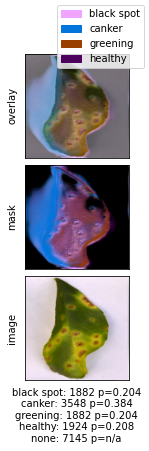

[(1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4)]
(128, 128, 4)
(128, 128, 3) (128, 128, 3)
(3, 1)


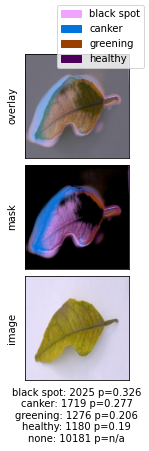

[(1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4)]
(128, 128, 4)
(128, 128, 3) (128, 128, 3)
(3, 1)


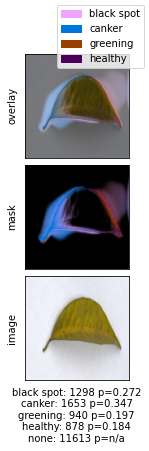

[(1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4)]
(128, 128, 4)
(128, 128, 3) (128, 128, 3)
(3, 1)


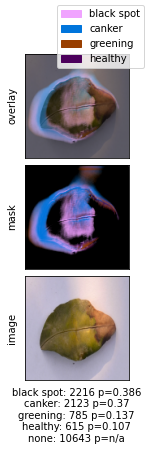

[(1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4)]
(128, 128, 4)
(128, 128, 3) (128, 128, 3)
(3, 1)


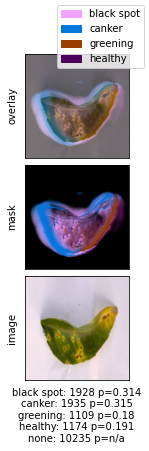

In [5]:
from supervised.models.cnn import *
from supervised.evaluations.image_classification import show_mask

from supervised.util import load_most_recent_results

result_path = '../results/'

results = load_most_recent_results(result_path, 1)[0]

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data
keras_model = model_data.get_model()
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']
test_dset = test_dset.batch(1)

for x, y in iter(test_dset):
    print(x.shape, y.shape)
    break

show_mask(test_dset, 5, model_data, class_names=class_names)

In [4]:
"""
hardware_params must include:

    'n_gpu': uint
    'n_cpu': uint
    'node': str
    'partition': str
    'time': str (we will just write this to the file)
    'memory': uint
    'distributed': bool
"""
hardware_params = {
    'name': 'G4',
    'n_gpu': 2,
    'n_cpu': 32,
    'partition': 'ai2es',
    'nodelist': ['c733'],
    'time': '48:00:00',
    'memory': 8196,
    # The %04a is translated into a 4-digit number that encodes the SLURM_ARRAY_TASK_ID
    'stdout_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt',
    'stderr_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt',
    'email': 'jay.c.rothenberger@ou.edu',
    'dir': '/scratch/jroth/AI2ES-DL/',
    'array': '[0-8%1]'
}
"""
network_params must include:
    
    'network_fn': network building function
    'network_args': arguments to pass to network building function
        network_args must include:
            'lrate': float
    'hyperband': bool
"""
network_params = {
    'network_fn': build_camnet_reorderedv4,
    'network_args': {
        'lrate': 1e-3,
        'n_classes': 4,
        'iterations': 3,
        'conv_filters': ['[16]', '[24]', '[32]'],
        'depth': [6, 7, 8],
        'conv_size': '[3]',
        'dense_layers': '[32, 16]',
        'learning_rate': 5e-4,
        'image_size': (128, 128, 3),
        'l1': None,
        'l2': None,
        'alpha': .005,
        'beta': .005,
    },
    'hyperband': False
}
"""
experiment_params must include:
    
    'seed': random seed for computation
    'steps_per_epoch': uint
    'validation_steps': uint
    'patience': uint
    'min_delta': float
    'epochs': uint
    'nogo': bool
"""
experiment_params = {
    'seed': 42,
    'steps_per_epoch': 1024,
    'validation_steps': 256,
    'patience': 10,
    'min_delta': 0.0,
    'epochs': 512,
    'nogo': False,
}
"""
dataset_params must include:
    'dset_fn': dataset loading function
    'dset_args': arguments for dataset loading function
    'cache': str or bool
    'batch': uint
    'prefetch': uint
    'shuffle': bool
    'augs': iterable of data augmentation functions
"""
dataset_params = {
    'dset_fn': citrus_leaves,
    'dset_args': {
        'image_size': (128, 128),
        'path': '../data/',
    },
    'cache': True,
    'cache_to_lscratch': False,
    'batch': 20,
    'prefetch': 4,
    'shuffle': True,
    'augs': [custom_rand_augment_dset]
}

config0 = Config(hardware_params, network_params, dataset_params, experiment_params)

In [5]:
exp0 = Experiment(config0)

print(exp0.params)
exp0.run_array(0)

{'seed': 42, 'steps_per_epoch': 1024, 'validation_steps': 256, 'patience': 10, 'min_delta': 0.0, 'epochs': 512, 'nogo': False}
Size of Hyperparameter Grid: 9
{
	name: G4
	n_gpu: 2
	n_cpu: 32
	partition: ai2es
	nodelist: ['c733']
	time: 48:00:00
	memory: 8196
	stdout_path: /scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt
	stderr_path: /scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt
	email: jay.c.rothenberger@ou.edu
	dir: /scratch/jroth/AI2ES-DL/
	array: [0-8%1]
	}
{
	seed: 42
	steps_per_epoch: 1024
	validation_steps: 256
	patience: 10
	min_delta: 0.0
	epochs: 512
	nogo: False
	}
{
	network_fn: <function build_camnet_reorderedv4 at 0x2b82fa3096c0>
	network_args: {
		hyperband: False
		depth: 6
		learning_rate: 0.0005
		l2: None
		alpha: 0.005
		dense_layers: [32, 16]
		conv_size: [3]
		n_classes: 4
		image_size: (128, 128, 3)
		lrate: 0.001
		l1: None
		beta: 0.005
		iterations: 3
		conv_filters: [16]
		}
	hyperband: False
	}
{
	dset_fn: <function citrus_le

INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0', '/job:localhost/replica:0/task:0/device:GPU:1')


(None, 128, 128, 5)
1024 None
Model: "clam_masker"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 clam (Functional)              [(None, 4),          443237      ['input_9[0][0]',                
                                 (None,),                         'plurality_masker[0][0]',       
                                 (None, 128, 128, 5               'all_masker[0][0]']             
                                )]                                                                
                                                          

2022-12-27 11:59:03.835811: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:547] The `assert_cardinality` transformation is currently not handled by the auto-shard rewrite and will be removed.


1023/1024 [============================>.] - ETA: 0s - loss: 0.5313 - clam_loss: 0.5008 - tf.math.multiply_9_loss: 5.1197 - clam_1_loss: 0.9785 - clam_categorical_accuracy: 0.8227 - clam_1_categorical_accuracy: 0.7677

2022-12-27 12:00:02.764534: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:547] The `assert_cardinality` transformation is currently not handled by the auto-shard rewrite and will be removed.


1024/1024 [==============================] - 64s 41ms/step - loss: 0.5310 - clam_loss: 0.5005 - tf.math.multiply_9_loss: 5.1185 - clam_1_loss: 0.9786 - clam_categorical_accuracy: 0.8228 - clam_1_categorical_accuracy: 0.7677 - val_loss: 0.4342 - val_clam_loss: 0.4020 - val_tf.math.multiply_9_loss: 5.3505 - val_clam_1_loss: 1.0700 - val_clam_categorical_accuracy: 0.8475 - val_clam_1_categorical_accuracy: 0.7797 - lr: 0.0010
Epoch 2/512
1024/1024 [==============================] - 37s 36ms/step - loss: 0.1967 - clam_loss: 0.1681 - tf.math.multiply_9_loss: 4.6615 - clam_1_loss: 1.0646 - clam_categorical_accuracy: 0.9501 - clam_1_categorical_accuracy: 0.7828 - val_loss: 0.2599 - val_clam_loss: 0.2291 - val_tf.math.multiply_9_loss: 5.0708 - val_clam_1_loss: 1.0741 - val_clam_categorical_accuracy: 0.9153 - val_clam_1_categorical_accuracy: 0.8305 - lr: 7.1394e-04
Epoch 3/512
1024/1024 [==============================] - 36s 35ms/step - loss: 0.0709 - clam_loss: 0.0467 - tf.math.multiply_9_loss:

2022-12-27 12:11:57.768950: W tensorflow/core/kernels/data/cache_dataset_ops.cc:768] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2022-12-27 12:11:59.058995: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ../results/stupid_models/16721647177555046/assets


INFO:tensorflow:Assets written to: ../results/stupid_models/16721647177555046/assets


returning model data



------------------------------------------------------------
Experimental Results Summary (Index: 0)
------------------------------------------------------------
Dataset Params: {
	dset_fn: <function citrus_leaves at 0x2b82fb28ff40>
	dset_args: {
		image_size: (128, 128)
		path: ../data/
		}
	cache: True
	cache_to_lscratch: False
	batch: 12
	prefetch: 4
	shuffle: True
	augs: [<function custom_rand_augment_dset at 0x2b82fb2bd510>]
	}

Network Params:  {
	network_fn: <function build_camnet_reorderedv4 at 0x2b82fa3096c0>
	network_args: {
		hyperband: False
		depth: 6
		learning_rate: 0.0005
		l2: None
		alpha: 0.005
		dense_layers: [32, 16]
		conv_size: [3]
		n_classes: 4
		image_size: (128, 128, 3)
		lrate: 0.001
		l1: None
		beta: 0.005
		iterations: 3
		conv_filters: [16]
		}
	hyperband: False
	}
------------------------------------------------------------
Experiment Parameters: {
	seed: 42
	steps_per_epoch: 1024
	validation_steps: 256
	patience: 10
	min_delta: 0.0
	epochs: 512
	nogo:

[[0. 1. 0. 0. 1.]]
(1, 128, 128, 5)
[(1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4)]
(128, 128, 4)
(128, 128, 3) (128, 128, 3)
(3, 1)


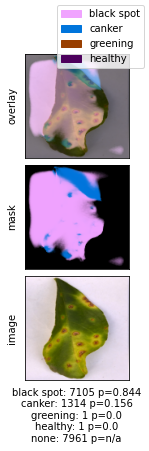

[(1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4)]
(128, 128, 4)
(128, 128, 3) (128, 128, 3)
(3, 1)


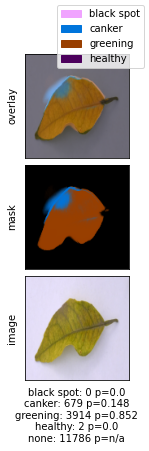

[(1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4)]
(128, 128, 4)
(128, 128, 3) (128, 128, 3)
(3, 1)


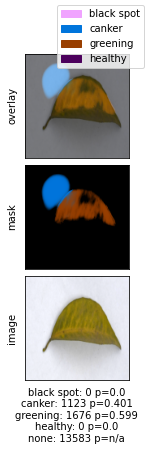

[(1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4)]
(128, 128, 4)
(128, 128, 3) (128, 128, 3)
(3, 1)


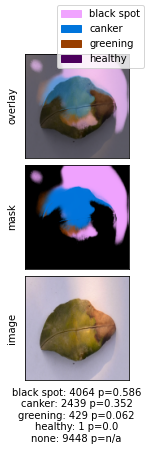

[(1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4), (1, 128, 128, 4)]
(128, 128, 4)
(128, 128, 3) (128, 128, 3)
(3, 1)


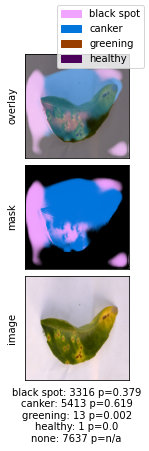

In [6]:
from supervised.models.cnn import *
from supervised.evaluations.image_classification import show_mask

from supervised.util import load_most_recent_results

result_path = '../results/'

results = load_most_recent_results(result_path, 1)[0]

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data
keras_model = model_data.get_model()
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']
test_dset = test_dset.batch(1)

for x, y in iter(test_dset):
    print(x.shape, y.shape)
    break

show_mask(test_dset, 5, model_data, class_names=class_names)

In [10]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [5]:
from supervised.util import prep_gpu

prep_gpu(12, 1, wait=False)

IndexError: list index out of range

In [ ]:
from supervised.util import Config, Experiment, load_most_recent_results

from supervised.models.cnn import build_camnet_reorderedv5, build_camnet_reorderedv6, build_camnet_reorderedv7

from supervised.datasets.image_classification import deep_weeds, cats_dogs, dot_dataset, citrus_leaves
from supervised.data_augmentation.msda import mixup_dset, blended_dset
from supervised.data_augmentation.ssda import add_gaussian_noise_dset, custom_rand_augment_dset, foff_dset

import os
from os import listdir
from os.path import isfile, join

import pickle

"""
hardware_params must include:

    'n_gpu': uint
    'n_cpu': uint
    'node': str
    'partition': str
    'time': str (we will just write this to the file)
    'memory': uint
    'distributed': bool
"""
hardware_params = {
    'name': 'G4',
    'n_gpu': 4,
    'n_cpu': 32,
    'partition': 'ai2es',
    'nodelist': ['c733'],
    'time': '48:00:00',
    'memory': 8196,
    # The %04a is translated into a 4-digit number that encodes the SLURM_ARRAY_TASK_ID
    'stdout_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt',
    'stderr_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt',
    'email': 'jay.c.rothenberger@ou.edu',
    'dir': '/scratch/jroth/AI2ES-DL/',
    'array': '[0-8%1]',
    'results_dir': 'random'
}
"""
network_params must include:
    
    'network_fn': network building function
    'network_args': arguments to pass to network building function
        network_args must include:
            'lrate': float
    'hyperband': bool
"""
image_size = (128, 128, 3)


network_params = {
    'network_fn': build_camnet_reorderedv5,
    'network_args': {
        'lrate': 1e-3,
        'n_classes': 2,
        'iterations': 3,
        'conv_filters': 32,
        'depth': 5,
        'conv_size': '[3]',
        'dense_layers': '[32, 16]',
        'learning_rate': 1e-3,
        'image_size': image_size,
        'l1': None,
        'l2': None,
        'alpha': 2**(-8),
        'beta': 2**(-8),
    },
    'hyperband': False
}
"""
experiment_params must include:
    
    'seed': random seed for computation
    'steps_per_epoch': uint
    'validation_steps': uint
    'patience': uint
    'min_delta': float
    'epochs': uint
    'nogo': bool
"""
experiment_params = {
    'seed': 42,
    'steps_per_epoch': 512,
    'validation_steps': 256,
    'patience': 32,
    'min_delta': 0.0,
    'epochs': 512,
    'nogo': False,
}
"""
dataset_params must include:
    'dset_fn': dataset loading function
    'dset_args': arguments for dataset loading function
    'cache': str or bool
    'batch': uint
    'prefetch': uint
    'shuffle': bool
    'augs': iterable of data augmentation functions
"""
dataset_params = {
    'dset_fn': cats_dogs,
    'dset_args': {
        'image_size': image_size[:-1],
        'path': '../data/',
    },
    'cache': False,
    'cache_to_lscratch': False,
    'batch': 194,
    'prefetch': 4,
    'shuffle': True,
    'augs': [custom_rand_augment_dset]
}

config1 = Config(hardware_params, network_params, dataset_params, experiment_params)


In [ ]:
exp1 = Experiment(config1)

print(exp1.params)

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import sys
stderr = sys.stderr
f = open(os.devnull, 'w')
sys.stderr = f

import warnings
with warnings.catch_warnings(record=True):
    warnings.simplefilter('ignore')
    exp1.run_array(0)
    
sys.stderr = stderr


------------------------------------------------------------
Experimental Results Summary (Index: 0)
------------------------------------------------------------
Dataset Params: {
	dset_fn: <function cats_dogs at 0x2b6d19f40dc0>
	dset_args: {
		image_size: (128, 128)
		path: ../data/
		}
	cache: False
	cache_to_lscratch: False
	batch: 97
	prefetch: 4
	shuffle: True
	augs: [<function custom_rand_augment_dset at 0x2b6d1afbdf30>]
	}

Network Params:  {
	network_fn: <function build_camnet_reorderedv5 at 0x2b6d19f40a60>
	network_args: {
		hyperband: False
		image_size: (128, 128, 3)
		l1: None
		conv_filters: 32
		lrate: 0.001
		dense_layers: [32, 16]
		alpha: 0.0009765625
		learning_rate: 0.001
		l2: None
		depth: 5
		beta: 0.0009765625
		n_classes: 2
		iterations: 3
		conv_size: [3]
		}
	hyperband: False
	}
------------------------------------------------------------
Experiment Parameters: {
	seed: 42
	steps_per_epoch: 512
	validation_steps: 256
	patience: 10
	min_delta: 0.0
	epochs: 512

Corrupt JPEG data: 164 extraneous bytes before marker 0xd9


(97, 128, 128, 3) (97, 2)


Corrupt JPEG data: 164 extraneous bytes before marker 0xd9
Corrupt JPEG data: 259 extraneous bytes before marker 0xd9


(None, 128, 128, 3)
(None, 128, 128, 3)
(None, 128, 128, 3)
(None, 128, 128, 3)
(None, 128, 128, 3)
(3, 1)


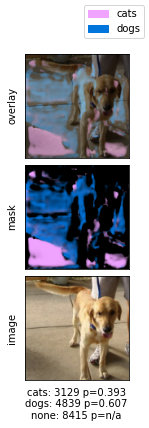

(3, 1)


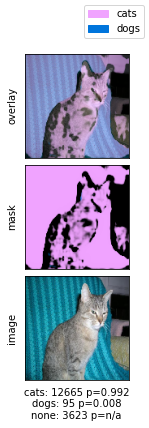

(3, 1)


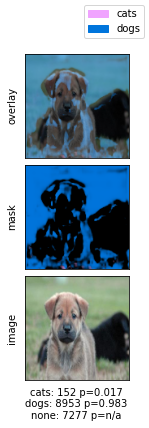

(3, 1)


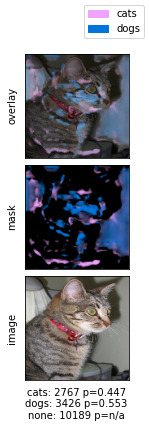

(3, 1)


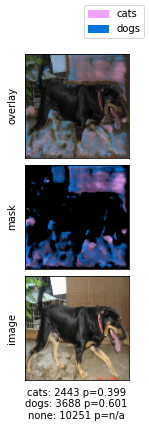

In [4]:
from supervised.models.cnn import *
from supervised.evaluations.image_classification import show_mask

from supervised.util import load_most_recent_results

result_path = '../random'

results = load_most_recent_results(result_path, 1)[0]

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data
keras_model = model_data.get_model()
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']
test_dset = test_dset.batch(results.config.dataset_params['batch'])

for x, y in iter(test_dset):
    print(x.shape, y.shape)
    break

show_mask(test_dset, 5, model_data, class_names=class_names)

In [2]:
print('hi')

hi


In [ ]:
from supervised.util import Config, Experiment, load_most_recent_results

from supervised.models.cnn import build_camnet_reorderedv5, build_camnet_reorderedv6

from supervised.datasets.image_classification import deep_weeds, cats_dogs, dot_dataset, citrus_leaves
from supervised.data_augmentation.msda import mixup_dset, blended_dset
from supervised.data_augmentation.ssda import add_gaussian_noise_dset, custom_rand_augment_dset, foff_dset

import os
from os import listdir
from os.path import isfile, join

import pickle

"""
hardware_params must include:

    'n_gpu': uint
    'n_cpu': uint
    'node': str
    'partition': str
    'time': str (we will just write this to the file)
    'memory': uint
    'distributed': bool
"""
hardware_params = {
    'name': 'G4',
    'n_gpu': 4,
    'n_cpu': 32,
    'partition': 'ai2es',
    'nodelist': ['c733'],
    'time': '48:00:00',
    'memory': 8196,
    # The %04a is translated into a 4-digit number that encodes the SLURM_ARRAY_TASK_ID
    'stdout_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt',
    'stderr_path': '/scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt',
    'email': 'jay.c.rothenberger@ou.edu',
    'dir': '/scratch/jroth/AI2ES-DL/',
    'array': '[0-8%1]',
    'results_dir': 'random'
}
"""
network_params must include:
    
    'network_fn': network building function
    'network_args': arguments to pass to network building function
        network_args must include:
            'lrate': float
    'hyperband': bool
"""
image_size = (128, 128, 3)


network_params = {
    'network_fn': build_camnet_reorderedv5,
    'network_args': {
        'lrate': 1e-3,
        'n_classes': 2,
        'iterations': 3,
        'conv_filters': 32,
        'conv_size': '[3]',
        'dense_layers': '[32, 16]',
        'learning_rate': 5e-4,
        'image_size': image_size,
        'l1': None,
        'l2': None,
        'alpha': 2**(-8),
        'beta': 2**(-8),
        'noise_level': 0.005,
        'depth': 5,
    },
    'hyperband': False
}
"""
experiment_params must include:
    
    'seed': random seed for computation
    'steps_per_epoch': uint
    'validation_steps': uint
    'patience': uint
    'min_delta': float
    'epochs': uint
    'nogo': bool
"""
experiment_params = {
    'seed': 42,
    'steps_per_epoch': 512,
    'validation_steps': 256,
    'patience': 32,
    'min_delta': 0.0,
    'epochs': 512,
    'nogo': False,
}
"""
dataset_params must include:
    'dset_fn': dataset loading function
    'dset_args': arguments for dataset loading function
    'cache': str or bool
    'batch': uint
    'prefetch': uint
    'shuffle': bool
    'augs': iterable of data augmentation functions
"""
dataset_params = {
    'dset_fn': cats_dogs,
    'dset_args': {
        'image_size': image_size[:-1],
        'path': '../data/',
    },
    'cache': False,
    'cache_to_lscratch': False,
    'batch': 194,
    'prefetch': 8,
    'shuffle': True,
    'augs': [custom_rand_augment_dset]
}

config2 = Config(hardware_params, network_params, dataset_params, experiment_params)

exp2 = Experiment(config2)

print(exp2.params)
exp2.run_array(0)

/home/fagg/miniconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


{'seed': 42, 'steps_per_epoch': 512, 'validation_steps': 256, 'patience': 32, 'min_delta': 0.0, 'epochs': 512, 'nogo': False}
Size of Hyperparameter Grid: 1
{
	name: G4
	n_gpu: 4
	n_cpu: 32
	partition: ai2es
	nodelist: ['c733']
	time: 48:00:00
	memory: 8196
	stdout_path: /scratch/jroth/supercomputer/text_outputs/exp%01a_stdout_%A.txt
	stderr_path: /scratch/jroth/supercomputer/text_outputs/exp%01a_stderr_%A.txt
	email: jay.c.rothenberger@ou.edu
	dir: /scratch/jroth/AI2ES-DL/
	array: [0-8%1]
	results_dir: random
	}
{
	seed: 42
	steps_per_epoch: 512
	validation_steps: 256
	patience: 32
	min_delta: 0.0
	epochs: 512
	nogo: False
	}
{
	network_fn: <function build_camnet_reorderedv5 at 0x2ac077084af0>
	network_args: {
		hyperband: False
		alpha: 0.00390625
		conv_size: [3]
		noise_level: 0.005
		depth: 5
		image_size: (128, 128, 3)
		l1: None
		beta: 0.00390625
		iterations: 3
		conv_filters: 32
		lrate: 0.001
		dense_layers: [32, 16]
		l2: None
		n_classes: 2
		learning_rate: 0.0005
		}
	hyp

2023-01-09 23:54:48.110508: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-09 23:54:49.902621: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 38259 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:01:00.0, compute capability: 8.0
2023-01-09 23:54:49.904015: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 38259 MB memory:  -> device: 1, name: NVIDIA A100-SXM4-40GB, pci bus id: 0000:41:00.0, compute capability: 8.0
2023-01-09 23:54:49.905173: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/rep

(None, 128, 128, 3)
512 None
Model: "clam_masker"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 clam (Functional)              [(None, 2),          254391      ['input_1[0][0]',                
                                 (None,),                         'plurality_masker[0][0]',       
                                 (None, 128, 128, 3               'all_masker[0][0]']             
                                )]                                                                
                                                           

2023-01-09 23:54:54.607699: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:547] The `assert_cardinality` transformation is currently not handled by the auto-shard rewrite and will be removed.


INFO:tensorflow:batch_all_reduce: 208 all-reduces with algorithm = nccl, num_packs = 1


INFO:tensorflow:batch_all_reduce: 208 all-reduces with algorithm = nccl, num_packs = 1


INFO:tensorflow:batch_all_reduce: 208 all-reduces with algorithm = nccl, num_packs = 1


INFO:tensorflow:batch_all_reduce: 208 all-reduces with algorithm = nccl, num_packs = 1
2023-01-09 23:57:13.084298: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8401
2023-01-09 23:57:14.043085: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8401
2023-01-09 23:57:14.236113: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-01-09 23:57:14.431970: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2023-01-09 23:57:14.527600: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.
2023-01-09 23:57:15.129535: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn'

  3/512 [..............................] - ETA: 4:02 - loss: 0.7101 - clam_loss: 0.6873 - tf.math.multiply_4_loss: 5.6624 - clam_1_loss: 0.1742 - clam_categorical_accuracy: 0.5309 - clam_1_categorical_accuracy: 0.5086   

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


 15/512 [..............................] - ETA: 4:23 - loss: 0.6802 - clam_loss: 0.6597 - tf.math.multiply_4_loss: 5.0510 - clam_1_loss: 0.1922 - clam_categorical_accuracy: 0.6082 - clam_1_categorical_accuracy: 0.5450

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


 44/512 [=>............................] - ETA: 4:28 - loss: 0.6690 - clam_loss: 0.6495 - tf.math.multiply_4_loss: 4.7789 - clam_1_loss: 0.2093 - clam_categorical_accuracy: 0.6162 - clam_1_categorical_accuracy: 0.5486

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


 47/512 [=>............................] - ETA: 4:25 - loss: 0.6683 - clam_loss: 0.6490 - tf.math.multiply_4_loss: 4.7365 - clam_1_loss: 0.2106 - clam_categorical_accuracy: 0.6177 - clam_1_categorical_accuracy: 0.5508

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


 50/512 [=>............................] - ETA: 4:25 - loss: 0.6678 - clam_loss: 0.6485 - tf.math.multiply_4_loss: 4.7163 - clam_1_loss: 0.2124 - clam_categorical_accuracy: 0.6170 - clam_1_categorical_accuracy: 0.5530

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 51/512 [=>............................] - ETA: 4:24 - loss: 0.6676 - clam_loss: 0.6484 - tf.math.multiply_4_loss: 4.7142 - clam_1_loss: 0.2125 - clam_categorical_accuracy: 0.6174 - clam_1_categorical_accuracy: 0.5526

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


 52/512 [==>...........................] - ETA: 4:23 - loss: 0.6678 - clam_loss: 0.6485 - tf.math.multiply_4_loss: 4.7074 - clam_1_loss: 0.2128 - clam_categorical_accuracy: 0.6176 - clam_1_categorical_accuracy: 0.5539

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


 81/512 [===>..........................] - ETA: 4:21 - loss: 0.6616 - clam_loss: 0.6426 - tf.math.multiply_4_loss: 4.6229 - clam_1_loss: 0.2304 - clam_categorical_accuracy: 0.6259 - clam_1_categorical_accuracy: 0.5692

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


 86/512 [====>.........................] - ETA: 4:18 - loss: 0.6607 - clam_loss: 0.6418 - tf.math.multiply_4_loss: 4.6080 - clam_1_loss: 0.2314 - clam_categorical_accuracy: 0.6267 - clam_1_categorical_accuracy: 0.5725

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


 97/512 [====>.........................] - ETA: 4:13 - loss: 0.6604 - clam_loss: 0.6415 - tf.math.multiply_4_loss: 4.6005 - clam_1_loss: 0.2326 - clam_categorical_accuracy: 0.6264 - clam_1_categorical_accuracy: 0.5750

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


127/512 [======>.......................] - ETA: 3:56 - loss: 0.6587 - clam_loss: 0.6402 - tf.math.multiply_4_loss: 4.5111 - clam_1_loss: 0.2323 - clam_categorical_accuracy: 0.6274 - clam_1_categorical_accuracy: 0.5730

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


130/512 [======>.......................] - ETA: 3:54 - loss: 0.6584 - clam_loss: 0.6399 - tf.math.multiply_4_loss: 4.5091 - clam_1_loss: 0.2321 - clam_categorical_accuracy: 0.6279 - clam_1_categorical_accuracy: 0.5726

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


133/512 [======>.......................] - ETA: 3:53 - loss: 0.6583 - clam_loss: 0.6398 - tf.math.multiply_4_loss: 4.5117 - clam_1_loss: 0.2324 - clam_categorical_accuracy: 0.6282 - clam_1_categorical_accuracy: 0.5726

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


134/512 [======>.......................] - ETA: 3:52 - loss: 0.6585 - clam_loss: 0.6399 - tf.math.multiply_4_loss: 4.5144 - clam_1_loss: 0.2324 - clam_categorical_accuracy: 0.6278 - clam_1_categorical_accuracy: 0.5721

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


161/512 [========>.....................] - ETA: 3:36 - loss: 0.6564 - clam_loss: 0.6381 - tf.math.multiply_4_loss: 4.4379 - clam_1_loss: 0.2340 - clam_categorical_accuracy: 0.6290 - clam_1_categorical_accuracy: 0.5696

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


167/512 [========>.....................] - ETA: 3:32 - loss: 0.6556 - clam_loss: 0.6374 - tf.math.multiply_4_loss: 4.4313 - clam_1_loss: 0.2346 - clam_categorical_accuracy: 0.6299 - clam_1_categorical_accuracy: 0.5704

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


193/512 [==========>...................] - ETA: 3:10 - loss: 0.6538 - clam_loss: 0.6357 - tf.math.multiply_4_loss: 4.3723 - clam_1_loss: 0.2411 - clam_categorical_accuracy: 0.6314 - clam_1_categorical_accuracy: 0.5688

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


225/512 [============>.................] - ETA: 2:51 - loss: 0.6528 - clam_loss: 0.6348 - tf.math.multiply_4_loss: 4.3565 - clam_1_loss: 0.2429 - clam_categorical_accuracy: 0.6320 - clam_1_categorical_accuracy: 0.5709

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


229/512 [============>.................] - ETA: 2:48 - loss: 0.6531 - clam_loss: 0.6351 - tf.math.multiply_4_loss: 4.3606 - clam_1_loss: 0.2437 - clam_categorical_accuracy: 0.6318 - clam_1_categorical_accuracy: 0.5714

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


231/512 [============>.................] - ETA: 2:47 - loss: 0.6532 - clam_loss: 0.6352 - tf.math.multiply_4_loss: 4.3650 - clam_1_loss: 0.2437 - clam_categorical_accuracy: 0.6317 - clam_1_categorical_accuracy: 0.5717

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


233/512 [============>.................] - ETA: 2:46 - loss: 0.6533 - clam_loss: 0.6353 - tf.math.multiply_4_loss: 4.3689 - clam_1_loss: 0.2438 - clam_categorical_accuracy: 0.6313 - clam_1_categorical_accuracy: 0.5718

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


261/512 [==============>...............] - ETA: 2:29 - loss: 0.6542 - clam_loss: 0.6362 - tf.math.multiply_4_loss: 4.3669 - clam_1_loss: 0.2453 - clam_categorical_accuracy: 0.6304 - clam_1_categorical_accuracy: 0.5721

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


267/512 [==============>...............] - ETA: 2:25 - loss: 0.6539 - clam_loss: 0.6359 - tf.math.multiply_4_loss: 4.3570 - clam_1_loss: 0.2465 - clam_categorical_accuracy: 0.6305 - clam_1_categorical_accuracy: 0.5714

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


278/512 [===============>..............] - ETA: 2:19 - loss: 0.6533 - clam_loss: 0.6355 - tf.math.multiply_4_loss: 4.3282 - clam_1_loss: 0.2484 - clam_categorical_accuracy: 0.6313 - clam_1_categorical_accuracy: 0.5706

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


308/512 [=================>............] - ETA: 2:01 - loss: 0.6518 - clam_loss: 0.6343 - tf.math.multiply_4_loss: 4.2372 - clam_1_loss: 0.2554 - clam_categorical_accuracy: 0.6325 - clam_1_categorical_accuracy: 0.5688

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


312/512 [=================>............] - ETA: 1:58 - loss: 0.6519 - clam_loss: 0.6344 - tf.math.multiply_4_loss: 4.2288 - clam_1_loss: 0.2564 - clam_categorical_accuracy: 0.6323 - clam_1_categorical_accuracy: 0.5686

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


315/512 [=================>............] - ETA: 1:57 - loss: 0.6518 - clam_loss: 0.6343 - tf.math.multiply_4_loss: 4.2231 - clam_1_loss: 0.2569 - clam_categorical_accuracy: 0.6324 - clam_1_categorical_accuracy: 0.5683

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


316/512 [=================>............] - ETA: 1:56 - loss: 0.6519 - clam_loss: 0.6344 - tf.math.multiply_4_loss: 4.2215 - clam_1_loss: 0.2572 - clam_categorical_accuracy: 0.6324 - clam_1_categorical_accuracy: 0.5684

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


345/512 [===================>..........] - ETA: 1:39 - loss: 0.6509 - clam_loss: 0.6336 - tf.math.multiply_4_loss: 4.1622 - clam_1_loss: 0.2642 - clam_categorical_accuracy: 0.6337 - clam_1_categorical_accuracy: 0.5669

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


351/512 [===================>..........] - ETA: 1:35 - loss: 0.6509 - clam_loss: 0.6337 - tf.math.multiply_4_loss: 4.1451 - clam_1_loss: 0.2659 - clam_categorical_accuracy: 0.6334 - clam_1_categorical_accuracy: 0.5664

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


363/512 [====================>.........] - ETA: 1:28 - loss: 0.6506 - clam_loss: 0.6334 - tf.math.multiply_4_loss: 4.1135 - clam_1_loss: 0.2693 - clam_categorical_accuracy: 0.6338 - clam_1_categorical_accuracy: 0.5651

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


393/512 [======================>.......] - ETA: 1:12 - loss: 0.6505 - clam_loss: 0.6336 - tf.math.multiply_4_loss: 4.0344 - clam_1_loss: 0.2786 - clam_categorical_accuracy: 0.6337 - clam_1_categorical_accuracy: 0.5627

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


396/512 [======================>.......] - ETA: 1:10 - loss: 0.6507 - clam_loss: 0.6338 - tf.math.multiply_4_loss: 4.0359 - clam_1_loss: 0.2793 - clam_categorical_accuracy: 0.6334 - clam_1_categorical_accuracy: 0.5628

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


399/512 [======================>.......] - ETA: 1:08 - loss: 0.6508 - clam_loss: 0.6339 - tf.math.multiply_4_loss: 4.0345 - clam_1_loss: 0.2799 - clam_categorical_accuracy: 0.6333 - clam_1_categorical_accuracy: 0.5627

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


400/512 [======================>.......] - ETA: 1:07 - loss: 0.6509 - clam_loss: 0.6340 - tf.math.multiply_4_loss: 4.0343 - clam_1_loss: 0.2801 - clam_categorical_accuracy: 0.6332 - clam_1_categorical_accuracy: 0.5628

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


401/512 [======================>.......] - ETA: 1:07 - loss: 0.6509 - clam_loss: 0.6340 - tf.math.multiply_4_loss: 4.0345 - clam_1_loss: 0.2803 - clam_categorical_accuracy: 0.6332 - clam_1_categorical_accuracy: 0.5627

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


430/512 [========================>.....] - ETA: 49s - loss: 0.6516 - clam_loss: 0.6347 - tf.math.multiply_4_loss: 4.0250 - clam_1_loss: 0.2843 - clam_categorical_accuracy: 0.6328 - clam_1_categorical_accuracy: 0.5628

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


436/512 [========================>.....] - ETA: 45s - loss: 0.6515 - clam_loss: 0.6347 - tf.math.multiply_4_loss: 4.0167 - clam_1_loss: 0.2855 - clam_categorical_accuracy: 0.6328 - clam_1_categorical_accuracy: 0.5627

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


447/512 [=========================>....] - ETA: 39s - loss: 0.6511 - clam_loss: 0.6344 - tf.math.multiply_4_loss: 3.9968 - clam_1_loss: 0.2879 - clam_categorical_accuracy: 0.6330 - clam_1_categorical_accuracy: 0.5618

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


476/512 [==========================>...] - ETA: 21s - loss: 0.6503 - clam_loss: 0.6338 - tf.math.multiply_4_loss: 3.9337 - clam_1_loss: 0.2954 - clam_categorical_accuracy: 0.6340 - clam_1_categorical_accuracy: 0.5599

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


480/512 [===========================>..] - ETA: 19s - loss: 0.6501 - clam_loss: 0.6336 - tf.math.multiply_4_loss: 3.9251 - clam_1_loss: 0.2964 - clam_categorical_accuracy: 0.6340 - clam_1_categorical_accuracy: 0.5599

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


482/512 [===========================>..] - ETA: 18s - loss: 0.6499 - clam_loss: 0.6334 - tf.math.multiply_4_loss: 3.9207 - clam_1_loss: 0.2969 - clam_categorical_accuracy: 0.6342 - clam_1_categorical_accuracy: 0.5599

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


483/512 [===========================>..] - ETA: 17s - loss: 0.6499 - clam_loss: 0.6335 - tf.math.multiply_4_loss: 3.9192 - clam_1_loss: 0.2972 - clam_categorical_accuracy: 0.6342 - clam_1_categorical_accuracy: 0.5599

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


484/512 [===========================>..] - ETA: 16s - loss: 0.6499 - clam_loss: 0.6334 - tf.math.multiply_4_loss: 3.9173 - clam_1_loss: 0.2975 - clam_categorical_accuracy: 0.6342 - clam_1_categorical_accuracy: 0.5599

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


512/512 [==============================] - ETA: 0s - loss: 0.6488 - clam_loss: 0.6325 - tf.math.multiply_4_loss: 3.8625 - clam_1_loss: 0.3041 - clam_categorical_accuracy: 0.6357 - clam_1_categorical_accuracy: 0.5589

2023-01-10 00:02:29.937704: W tensorflow/core/grappler/optimizers/data/auto_shard.cc:547] The `assert_cardinality` transformation is currently not handled by the auto-shard rewrite and will be removed.
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/512 [==============================] - 479s 650ms/step - loss: 0.6488 - clam_loss: 0.6325 - tf.math.multiply_4_loss: 3.8625 - clam_1_loss: 0.3041 - clam_categorical_accuracy: 0.6357 - clam_1_categorical_accuracy: 0.5589 - val_loss: 0.8649 - val_clam_loss: 0.8444 - val_tf.math.multiply_4_loss: 4.9248 - val_clam_1_loss: 0.3065 - val_clam_categorical_accuracy: 0.5440 - val_clam_1_categorical_accuracy: 0.5849 - lr: 0.0010
Epoch 2/512
  2/512 [..............................] - ETA: 4:54 - loss: 0.5869 - clam_loss: 0.5755 - tf.math.multiply_4_loss: 2.4687 - clam_1_loss: 0.4395 - clam_categorical_accuracy: 0.6985 - clam_1_categorical_accuracy: 0.5515

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


  7/512 [..............................] - ETA: 4:46 - loss: 0.6178 - clam_loss: 0.6059 - tf.math.multiply_4_loss: 2.6188 - clam_1_loss: 0.4335 - clam_categorical_accuracy: 0.6576 - clam_1_categorical_accuracy: 0.5449

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


 19/512 [>.............................] - ETA: 4:45 - loss: 0.6181 - clam_loss: 0.6063 - tf.math.multiply_4_loss: 2.5767 - clam_1_loss: 0.4349 - clam_categorical_accuracy: 0.6696 - clam_1_categorical_accuracy: 0.5233

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


 48/512 [=>............................] - ETA: 4:32 - loss: 0.6233 - clam_loss: 0.6116 - tf.math.multiply_4_loss: 2.5463 - clam_1_loss: 0.4448 - clam_categorical_accuracy: 0.6618 - clam_1_categorical_accuracy: 0.5237

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


 52/512 [==>...........................] - ETA: 4:30 - loss: 0.6231 - clam_loss: 0.6114 - tf.math.multiply_4_loss: 2.5607 - clam_1_loss: 0.4445 - clam_categorical_accuracy: 0.6628 - clam_1_categorical_accuracy: 0.5273

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


 55/512 [==>...........................] - ETA: 4:59 - loss: 0.6233 - clam_loss: 0.6115 - tf.math.multiply_4_loss: 2.5771 - clam_1_loss: 0.4435 - clam_categorical_accuracy: 0.6631 - clam_1_categorical_accuracy: 0.5304

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


 56/512 [==>...........................] - ETA: 4:58 - loss: 0.6238 - clam_loss: 0.6120 - tf.math.multiply_4_loss: 2.5816 - clam_1_loss: 0.4437 - clam_categorical_accuracy: 0.6626 - clam_1_categorical_accuracy: 0.5310

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


 85/512 [===>..........................] - ETA: 4:31 - loss: 0.6209 - clam_loss: 0.6089 - tf.math.multiply_4_loss: 2.6574 - clam_1_loss: 0.4378 - clam_categorical_accuracy: 0.6664 - clam_1_categorical_accuracy: 0.5356

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


 91/512 [====>.........................] - ETA: 4:25 - loss: 0.6218 - clam_loss: 0.6096 - tf.math.multiply_4_loss: 2.6776 - clam_1_loss: 0.4371 - clam_categorical_accuracy: 0.6647 - clam_1_categorical_accuracy: 0.5355

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


103/512 [=====>........................] - ETA: 4:14 - loss: 0.6219 - clam_loss: 0.6097 - tf.math.multiply_4_loss: 2.6812 - clam_1_loss: 0.4351 - clam_categorical_accuracy: 0.6646 - clam_1_categorical_accuracy: 0.5338

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


133/512 [======>.......................] - ETA: 3:54 - loss: 0.6209 - clam_loss: 0.6088 - tf.math.multiply_4_loss: 2.6671 - clam_1_loss: 0.4349 - clam_categorical_accuracy: 0.6663 - clam_1_categorical_accuracy: 0.5336

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


136/512 [======>.......................] - ETA: 3:51 - loss: 0.6210 - clam_loss: 0.6089 - tf.math.multiply_4_loss: 2.6603 - clam_1_loss: 0.4357 - clam_categorical_accuracy: 0.6660 - clam_1_categorical_accuracy: 0.5337

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


139/512 [=======>......................] - ETA: 3:50 - loss: 0.6207 - clam_loss: 0.6086 - tf.math.multiply_4_loss: 2.6552 - clam_1_loss: 0.4368 - clam_categorical_accuracy: 0.6664 - clam_1_categorical_accuracy: 0.5342

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


140/512 [=======>......................] - ETA: 3:49 - loss: 0.6208 - clam_loss: 0.6088 - tf.math.multiply_4_loss: 2.6537 - clam_1_loss: 0.4369 - clam_categorical_accuracy: 0.6662 - clam_1_categorical_accuracy: 0.5341

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


169/512 [========>.....................] - ETA: 3:29 - loss: 0.6181 - clam_loss: 0.6062 - tf.math.multiply_4_loss: 2.6139 - clam_1_loss: 0.4404 - clam_categorical_accuracy: 0.6689 - clam_1_categorical_accuracy: 0.5334

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


175/512 [=========>....................] - ETA: 3:25 - loss: 0.6180 - clam_loss: 0.6061 - tf.math.multiply_4_loss: 2.6088 - clam_1_loss: 0.4409 - clam_categorical_accuracy: 0.6686 - clam_1_categorical_accuracy: 0.5333

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


186/512 [=========>....................] - ETA: 3:19 - loss: 0.6172 - clam_loss: 0.6054 - tf.math.multiply_4_loss: 2.5971 - clam_1_loss: 0.4417 - clam_categorical_accuracy: 0.6693 - clam_1_categorical_accuracy: 0.5323

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


216/512 [===========>..................] - ETA: 3:00 - loss: 0.6162 - clam_loss: 0.6044 - tf.math.multiply_4_loss: 2.5735 - clam_1_loss: 0.4429 - clam_categorical_accuracy: 0.6705 - clam_1_categorical_accuracy: 0.5316

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


219/512 [===========>..................] - ETA: 2:58 - loss: 0.6158 - clam_loss: 0.6040 - tf.math.multiply_4_loss: 2.5726 - clam_1_loss: 0.4432 - clam_categorical_accuracy: 0.6707 - clam_1_categorical_accuracy: 0.5321

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


222/512 [============>.................] - ETA: 2:56 - loss: 0.6156 - clam_loss: 0.6038 - tf.math.multiply_4_loss: 2.5716 - clam_1_loss: 0.4435 - clam_categorical_accuracy: 0.6710 - clam_1_categorical_accuracy: 0.5322

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


223/512 [============>.................] - ETA: 2:55 - loss: 0.6157 - clam_loss: 0.6040 - tf.math.multiply_4_loss: 2.5719 - clam_1_loss: 0.4436 - clam_categorical_accuracy: 0.6708 - clam_1_categorical_accuracy: 0.5324

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


224/512 [============>.................] - ETA: 2:55 - loss: 0.6157 - clam_loss: 0.6039 - tf.math.multiply_4_loss: 2.5711 - clam_1_loss: 0.4438 - clam_categorical_accuracy: 0.6708 - clam_1_categorical_accuracy: 0.5325

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


252/512 [=============>................] - ETA: 2:37 - loss: 0.6166 - clam_loss: 0.6046 - tf.math.multiply_4_loss: 2.6174 - clam_1_loss: 0.4380 - clam_categorical_accuracy: 0.6704 - clam_1_categorical_accuracy: 0.5341

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


258/512 [==============>...............] - ETA: 2:33 - loss: 0.6165 - clam_loss: 0.6045 - tf.math.multiply_4_loss: 2.6271 - clam_1_loss: 0.4371 - clam_categorical_accuracy: 0.6704 - clam_1_categorical_accuracy: 0.5347

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


271/512 [==============>...............] - ETA: 2:25 - loss: 0.6171 - clam_loss: 0.6050 - tf.math.multiply_4_loss: 2.6428 - clam_1_loss: 0.4350 - clam_categorical_accuracy: 0.6701 - clam_1_categorical_accuracy: 0.5353

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


301/512 [================>.............] - ETA: 2:07 - loss: 0.6172 - clam_loss: 0.6052 - tf.math.multiply_4_loss: 2.6450 - clam_1_loss: 0.4362 - clam_categorical_accuracy: 0.6705 - clam_1_categorical_accuracy: 0.5359

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


304/512 [================>.............] - ETA: 2:05 - loss: 0.6173 - clam_loss: 0.6052 - tf.math.multiply_4_loss: 2.6447 - clam_1_loss: 0.4366 - clam_categorical_accuracy: 0.6704 - clam_1_categorical_accuracy: 0.5361

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


307/512 [================>.............] - ETA: 2:03 - loss: 0.6172 - clam_loss: 0.6052 - tf.math.multiply_4_loss: 2.6435 - clam_1_loss: 0.4372 - clam_categorical_accuracy: 0.6702 - clam_1_categorical_accuracy: 0.5365

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


308/512 [=================>............] - ETA: 2:03 - loss: 0.6172 - clam_loss: 0.6051 - tf.math.multiply_4_loss: 2.6437 - clam_1_loss: 0.4374 - clam_categorical_accuracy: 0.6703 - clam_1_categorical_accuracy: 0.5366

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


309/512 [=================>............] - ETA: 2:02 - loss: 0.6171 - clam_loss: 0.6051 - tf.math.multiply_4_loss: 2.6431 - clam_1_loss: 0.4376 - clam_categorical_accuracy: 0.6704 - clam_1_categorical_accuracy: 0.5364

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


336/512 [==================>...........] - ETA: 1:46 - loss: 0.6169 - clam_loss: 0.6050 - tf.math.multiply_4_loss: 2.6299 - clam_1_loss: 0.4403 - clam_categorical_accuracy: 0.6707 - clam_1_categorical_accuracy: 0.5372

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


343/512 [===================>..........] - ETA: 1:41 - loss: 0.6166 - clam_loss: 0.6047 - tf.math.multiply_4_loss: 2.6255 - clam_1_loss: 0.4410 - clam_categorical_accuracy: 0.6709 - clam_1_categorical_accuracy: 0.5374

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


354/512 [===================>..........] - ETA: 1:35 - loss: 0.6162 - clam_loss: 0.6042 - tf.math.multiply_4_loss: 2.6198 - clam_1_loss: 0.4418 - clam_categorical_accuracy: 0.6710 - clam_1_categorical_accuracy: 0.5374

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


385/512 [=====================>........] - ETA: 1:17 - loss: 0.6154 - clam_loss: 0.6036 - tf.math.multiply_4_loss: 2.5943 - clam_1_loss: 0.4451 - clam_categorical_accuracy: 0.6715 - clam_1_categorical_accuracy: 0.5371

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


389/512 [=====================>........] - ETA: 1:14 - loss: 0.6151 - clam_loss: 0.6033 - tf.math.multiply_4_loss: 2.5915 - clam_1_loss: 0.4458 - clam_categorical_accuracy: 0.6716 - clam_1_categorical_accuracy: 0.5371

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


391/512 [=====================>........] - ETA: 1:13 - loss: 0.6152 - clam_loss: 0.6033 - tf.math.multiply_4_loss: 2.5901 - clam_1_loss: 0.4462 - clam_categorical_accuracy: 0.6715 - clam_1_categorical_accuracy: 0.5373

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


392/512 [=====================>........] - ETA: 1:12 - loss: 0.6152 - clam_loss: 0.6033 - tf.math.multiply_4_loss: 2.5904 - clam_1_loss: 0.4463 - clam_categorical_accuracy: 0.6715 - clam_1_categorical_accuracy: 0.5374

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


393/512 [======================>.......] - ETA: 1:12 - loss: 0.6151 - clam_loss: 0.6033 - tf.math.multiply_4_loss: 2.5900 - clam_1_loss: 0.4465 - clam_categorical_accuracy: 0.6715 - clam_1_categorical_accuracy: 0.5373

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


421/512 [=======================>......] - ETA: 55s - loss: 0.6144 - clam_loss: 0.6026 - tf.math.multiply_4_loss: 2.5682 - clam_1_loss: 0.4507 - clam_categorical_accuracy: 0.6721 - clam_1_categorical_accuracy: 0.5370

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


426/512 [=======================>......] - ETA: 52s - loss: 0.6143 - clam_loss: 0.6025 - tf.math.multiply_4_loss: 2.5640 - clam_1_loss: 0.4515 - clam_categorical_accuracy: 0.6722 - clam_1_categorical_accuracy: 0.5367

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


438/512 [========================>.....] - ETA: 44s - loss: 0.6143 - clam_loss: 0.6026 - tf.math.multiply_4_loss: 2.5521 - clam_1_loss: 0.4534 - clam_categorical_accuracy: 0.6722 - clam_1_categorical_accuracy: 0.5360

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


469/512 [==========================>...] - ETA: 26s - loss: 0.6141 - clam_loss: 0.6024 - tf.math.multiply_4_loss: 2.5299 - clam_1_loss: 0.4571 - clam_categorical_accuracy: 0.6726 - clam_1_categorical_accuracy: 0.5354

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


472/512 [==========================>...] - ETA: 24s - loss: 0.6141 - clam_loss: 0.6024 - tf.math.multiply_4_loss: 2.5294 - clam_1_loss: 0.4575 - clam_categorical_accuracy: 0.6726 - clam_1_categorical_accuracy: 0.5353

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


475/512 [==========================>...] - ETA: 22s - loss: 0.6141 - clam_loss: 0.6024 - tf.math.multiply_4_loss: 2.5289 - clam_1_loss: 0.4578 - clam_categorical_accuracy: 0.6726 - clam_1_categorical_accuracy: 0.5354

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


476/512 [==========================>...] - ETA: 21s - loss: 0.6141 - clam_loss: 0.6025 - tf.math.multiply_4_loss: 2.5291 - clam_1_loss: 0.4579 - clam_categorical_accuracy: 0.6726 - clam_1_categorical_accuracy: 0.5355

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


477/512 [==========================>...] - ETA: 21s - loss: 0.6142 - clam_loss: 0.6025 - tf.math.multiply_4_loss: 2.5294 - clam_1_loss: 0.4579 - clam_categorical_accuracy: 0.6726 - clam_1_categorical_accuracy: 0.5354

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


504/512 [============================>.] - ETA: 4s - loss: 0.6142 - clam_loss: 0.6026 - tf.math.multiply_4_loss: 2.5203 - clam_1_loss: 0.4597 - clam_categorical_accuracy: 0.6725 - clam_1_categorical_accuracy: 0.5349

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


510/512 [============================>.] - ETA: 1s - loss: 0.6140 - clam_loss: 0.6024 - tf.math.multiply_4_loss: 2.5173 - clam_1_loss: 0.4603 - clam_categorical_accuracy: 0.6726 - clam_1_categorical_accuracy: 0.5347

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


512/512 [==============================] - ETA: 0s - loss: 0.6140 - clam_loss: 0.6023 - tf.math.multiply_4_loss: 2.5166 - clam_1_loss: 0.4604 - clam_categorical_accuracy: 0.6726 - clam_1_categorical_accuracy: 0.5348

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/512 [==============================] - 314s 614ms/step - loss: 0.6140 - clam_loss: 0.6023 - tf.math.multiply_4_loss: 2.5166 - clam_1_loss: 0.4604 - clam_categorical_accuracy: 0.6726 - clam_1_categorical_accuracy: 0.5348 - val_loss: 0.8070 - val_clam_loss: 0.7908 - val_tf.math.multiply_4_loss: 3.7726 - val_clam_1_loss: 0.3651 - val_clam_categorical_accuracy: 0.5677 - val_clam_1_categorical_accuracy: 0.5552 - lr: 7.1394e-04
Epoch 3/512
 10/512 [..............................] - ETA: 4:50 - loss: 0.6201 - clam_loss: 0.6091 - tf.math.multiply_4_loss: 2.3224 - clam_1_loss: 0.4957 - clam_categorical_accuracy: 0.6670 - clam_1_categorical_accuracy: 0.5005

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


 40/512 [=>............................] - ETA: 4:40 - loss: 0.6136 - clam_loss: 0.6029 - tf.math.multiply_4_loss: 2.2348 - clam_1_loss: 0.5001 - clam_categorical_accuracy: 0.6716 - clam_1_categorical_accuracy: 0.5089

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


 44/512 [=>............................] - ETA: 4:37 - loss: 0.6124 - clam_loss: 0.6018 - tf.math.multiply_4_loss: 2.2259 - clam_1_loss: 0.5003 - clam_categorical_accuracy: 0.6716 - clam_1_categorical_accuracy: 0.5111

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


 47/512 [=>............................] - ETA: 4:36 - loss: 0.6119 - clam_loss: 0.6013 - tf.math.multiply_4_loss: 2.2211 - clam_1_loss: 0.5013 - clam_categorical_accuracy: 0.6727 - clam_1_categorical_accuracy: 0.5124

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 48/512 [=>............................] - ETA: 4:36 - loss: 0.6117 - clam_loss: 0.6011 - tf.math.multiply_4_loss: 2.2223 - clam_1_loss: 0.5016 - clam_categorical_accuracy: 0.6726 - clam_1_categorical_accuracy: 0.5128

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


 76/512 [===>..........................] - ETA: 4:19 - loss: 0.6075 - clam_loss: 0.5969 - tf.math.multiply_4_loss: 2.2198 - clam_1_loss: 0.5049 - clam_categorical_accuracy: 0.6787 - clam_1_categorical_accuracy: 0.5141

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


 82/512 [===>..........................] - ETA: 4:14 - loss: 0.6057 - clam_loss: 0.5950 - tf.math.multiply_4_loss: 2.2178 - clam_1_loss: 0.5056 - clam_categorical_accuracy: 0.6798 - clam_1_categorical_accuracy: 0.5143

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


 93/512 [====>.........................] - ETA: 4:07 - loss: 0.6040 - clam_loss: 0.5934 - tf.math.multiply_4_loss: 2.2182 - clam_1_loss: 0.5058 - clam_categorical_accuracy: 0.6806 - clam_1_categorical_accuracy: 0.5135

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


124/512 [======>.......................] - ETA: 3:48 - loss: 0.6034 - clam_loss: 0.5927 - tf.math.multiply_4_loss: 2.2145 - clam_1_loss: 0.5045 - clam_categorical_accuracy: 0.6799 - clam_1_categorical_accuracy: 0.5144

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


126/512 [======>.......................] - ETA: 3:48 - loss: 0.6029 - clam_loss: 0.5923 - tf.math.multiply_4_loss: 2.2124 - clam_1_loss: 0.5046 - clam_categorical_accuracy: 0.6802 - clam_1_categorical_accuracy: 0.5152

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


129/512 [======>.......................] - ETA: 3:46 - loss: 0.6030 - clam_loss: 0.5923 - tf.math.multiply_4_loss: 2.2134 - clam_1_loss: 0.5045 - clam_categorical_accuracy: 0.6799 - clam_1_categorical_accuracy: 0.5151

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


130/512 [======>.......................] - ETA: 3:45 - loss: 0.6030 - clam_loss: 0.5924 - tf.math.multiply_4_loss: 2.2136 - clam_1_loss: 0.5043 - clam_categorical_accuracy: 0.6800 - clam_1_categorical_accuracy: 0.5153

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


131/512 [======>.......................] - ETA: 3:44 - loss: 0.6032 - clam_loss: 0.5925 - tf.math.multiply_4_loss: 2.2135 - clam_1_loss: 0.5044 - clam_categorical_accuracy: 0.6797 - clam_1_categorical_accuracy: 0.5156

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


160/512 [========>.....................] - ETA: 3:28 - loss: 0.6010 - clam_loss: 0.5903 - tf.math.multiply_4_loss: 2.2298 - clam_1_loss: 0.5030 - clam_categorical_accuracy: 0.6822 - clam_1_categorical_accuracy: 0.5177

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


167/512 [========>.....................] - ETA: 3:28 - loss: 0.6005 - clam_loss: 0.5899 - tf.math.multiply_4_loss: 2.2309 - clam_1_loss: 0.5028 - clam_categorical_accuracy: 0.6823 - clam_1_categorical_accuracy: 0.5180

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


178/512 [=========>....................] - ETA: 3:21 - loss: 0.5998 - clam_loss: 0.5891 - tf.math.multiply_4_loss: 2.2326 - clam_1_loss: 0.5025 - clam_categorical_accuracy: 0.6829 - clam_1_categorical_accuracy: 0.5176

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


207/512 [===========>..................] - ETA: 3:03 - loss: 0.5994 - clam_loss: 0.5888 - tf.math.multiply_4_loss: 2.2364 - clam_1_loss: 0.5021 - clam_categorical_accuracy: 0.6835 - clam_1_categorical_accuracy: 0.5179

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


210/512 [===========>..................] - ETA: 3:01 - loss: 0.5993 - clam_loss: 0.5886 - tf.math.multiply_4_loss: 2.2374 - clam_1_loss: 0.5019 - clam_categorical_accuracy: 0.6836 - clam_1_categorical_accuracy: 0.5183

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


213/512 [===========>..................] - ETA: 3:00 - loss: 0.5992 - clam_loss: 0.5885 - tf.math.multiply_4_loss: 2.2382 - clam_1_loss: 0.5017 - clam_categorical_accuracy: 0.6839 - clam_1_categorical_accuracy: 0.5182

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


214/512 [===========>..................] - ETA: 2:59 - loss: 0.5993 - clam_loss: 0.5886 - tf.math.multiply_4_loss: 2.2382 - clam_1_loss: 0.5016 - clam_categorical_accuracy: 0.6842 - clam_1_categorical_accuracy: 0.5183

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


215/512 [===========>..................] - ETA: 2:58 - loss: 0.5995 - clam_loss: 0.5888 - tf.math.multiply_4_loss: 2.2382 - clam_1_loss: 0.5016 - clam_categorical_accuracy: 0.6839 - clam_1_categorical_accuracy: 0.5185

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


245/512 [=============>................] - ETA: 2:40 - loss: 0.5981 - clam_loss: 0.5873 - tf.math.multiply_4_loss: 2.2526 - clam_1_loss: 0.5011 - clam_categorical_accuracy: 0.6852 - clam_1_categorical_accuracy: 0.5192

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


251/512 [=============>................] - ETA: 2:36 - loss: 0.5980 - clam_loss: 0.5872 - tf.math.multiply_4_loss: 2.2545 - clam_1_loss: 0.5008 - clam_categorical_accuracy: 0.6850 - clam_1_categorical_accuracy: 0.5194

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


262/512 [==============>...............] - ETA: 2:29 - loss: 0.5974 - clam_loss: 0.5867 - tf.math.multiply_4_loss: 2.2549 - clam_1_loss: 0.5006 - clam_categorical_accuracy: 0.6852 - clam_1_categorical_accuracy: 0.5190

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


292/512 [================>.............] - ETA: 2:11 - loss: 0.5968 - clam_loss: 0.5861 - tf.math.multiply_4_loss: 2.2557 - clam_1_loss: 0.5006 - clam_categorical_accuracy: 0.6859 - clam_1_categorical_accuracy: 0.5191

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


295/512 [================>.............] - ETA: 2:10 - loss: 0.5966 - clam_loss: 0.5859 - tf.math.multiply_4_loss: 2.2553 - clam_1_loss: 0.5005 - clam_categorical_accuracy: 0.6861 - clam_1_categorical_accuracy: 0.5194

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


298/512 [================>.............] - ETA: 2:08 - loss: 0.5965 - clam_loss: 0.5857 - tf.math.multiply_4_loss: 2.2556 - clam_1_loss: 0.5005 - clam_categorical_accuracy: 0.6863 - clam_1_categorical_accuracy: 0.5195

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


299/512 [================>.............] - ETA: 2:07 - loss: 0.5965 - clam_loss: 0.5858 - tf.math.multiply_4_loss: 2.2552 - clam_1_loss: 0.5006 - clam_categorical_accuracy: 0.6862 - clam_1_categorical_accuracy: 0.5195

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


300/512 [================>.............] - ETA: 2:07 - loss: 0.5966 - clam_loss: 0.5858 - tf.math.multiply_4_loss: 2.2553 - clam_1_loss: 0.5007 - clam_categorical_accuracy: 0.6862 - clam_1_categorical_accuracy: 0.5197

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


328/512 [==================>...........] - ETA: 1:49 - loss: 0.5959 - clam_loss: 0.5851 - tf.math.multiply_4_loss: 2.2575 - clam_1_loss: 0.5012 - clam_categorical_accuracy: 0.6868 - clam_1_categorical_accuracy: 0.5197

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


334/512 [==================>...........] - ETA: 1:46 - loss: 0.5959 - clam_loss: 0.5851 - tf.math.multiply_4_loss: 2.2567 - clam_1_loss: 0.5014 - clam_categorical_accuracy: 0.6866 - clam_1_categorical_accuracy: 0.5196

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


346/512 [===================>..........] - ETA: 1:38 - loss: 0.5953 - clam_loss: 0.5846 - tf.math.multiply_4_loss: 2.2553 - clam_1_loss: 0.5014 - clam_categorical_accuracy: 0.6873 - clam_1_categorical_accuracy: 0.5194

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


376/512 [=====================>........] - ETA: 1:20 - loss: 0.5952 - clam_loss: 0.5845 - tf.math.multiply_4_loss: 2.2513 - clam_1_loss: 0.5017 - clam_categorical_accuracy: 0.6874 - clam_1_categorical_accuracy: 0.5192

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


379/512 [=====================>........] - ETA: 1:19 - loss: 0.5949 - clam_loss: 0.5842 - tf.math.multiply_4_loss: 2.2505 - clam_1_loss: 0.5018 - clam_categorical_accuracy: 0.6876 - clam_1_categorical_accuracy: 0.5194

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


382/512 [=====================>........] - ETA: 1:17 - loss: 0.5950 - clam_loss: 0.5842 - tf.math.multiply_4_loss: 2.2500 - clam_1_loss: 0.5018 - clam_categorical_accuracy: 0.6876 - clam_1_categorical_accuracy: 0.5194

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


383/512 [=====================>........] - ETA: 1:16 - loss: 0.5950 - clam_loss: 0.5842 - tf.math.multiply_4_loss: 2.2494 - clam_1_loss: 0.5019 - clam_categorical_accuracy: 0.6875 - clam_1_categorical_accuracy: 0.5195

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


384/512 [=====================>........] - ETA: 1:16 - loss: 0.5949 - clam_loss: 0.5841 - tf.math.multiply_4_loss: 2.2496 - clam_1_loss: 0.5019 - clam_categorical_accuracy: 0.6876 - clam_1_categorical_accuracy: 0.5196

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


412/512 [=======================>......] - ETA: 59s - loss: 0.5943 - clam_loss: 0.5835 - tf.math.multiply_4_loss: 2.2484 - clam_1_loss: 0.5018 - clam_categorical_accuracy: 0.6884 - clam_1_categorical_accuracy: 0.5200

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


417/512 [=======================>......] - ETA: 56s - loss: 0.5940 - clam_loss: 0.5833 - tf.math.multiply_4_loss: 2.2476 - clam_1_loss: 0.5017 - clam_categorical_accuracy: 0.6887 - clam_1_categorical_accuracy: 0.5201

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


430/512 [========================>.....] - ETA: 48s - loss: 0.5938 - clam_loss: 0.5831 - tf.math.multiply_4_loss: 2.2476 - clam_1_loss: 0.5015 - clam_categorical_accuracy: 0.6891 - clam_1_categorical_accuracy: 0.5200

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


460/512 [=========================>....] - ETA: 30s - loss: 0.5934 - clam_loss: 0.5827 - tf.math.multiply_4_loss: 2.2466 - clam_1_loss: 0.5016 - clam_categorical_accuracy: 0.6893 - clam_1_categorical_accuracy: 0.5199

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


464/512 [==========================>...] - ETA: 28s - loss: 0.5932 - clam_loss: 0.5825 - tf.math.multiply_4_loss: 2.2460 - clam_1_loss: 0.5016 - clam_categorical_accuracy: 0.6896 - clam_1_categorical_accuracy: 0.5200

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


467/512 [==========================>...] - ETA: 27s - loss: 0.5932 - clam_loss: 0.5825 - tf.math.multiply_4_loss: 2.2453 - clam_1_loss: 0.5015 - clam_categorical_accuracy: 0.6896 - clam_1_categorical_accuracy: 0.5202

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


468/512 [==========================>...] - ETA: 26s - loss: 0.5932 - clam_loss: 0.5825 - tf.math.multiply_4_loss: 2.2455 - clam_1_loss: 0.5015 - clam_categorical_accuracy: 0.6895 - clam_1_categorical_accuracy: 0.5202

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


496/512 [============================>.] - ETA: 9s - loss: 0.5926 - clam_loss: 0.5819 - tf.math.multiply_4_loss: 2.2511 - clam_1_loss: 0.5010 - clam_categorical_accuracy: 0.6900 - clam_1_categorical_accuracy: 0.5206 

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


502/512 [============================>.] - ETA: 6s - loss: 0.5925 - clam_loss: 0.5818 - tf.math.multiply_4_loss: 2.2514 - clam_1_loss: 0.5008 - clam_categorical_accuracy: 0.6900 - clam_1_categorical_accuracy: 0.5206

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


512/512 [==============================] - ETA: 0s - loss: 0.5923 - clam_loss: 0.5815 - tf.math.multiply_4_loss: 2.2511 - clam_1_loss: 0.5006 - clam_categorical_accuracy: 0.6904 - clam_1_categorical_accuracy: 0.5204

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/512 [==============================] - 313s 611ms/step - loss: 0.5923 - clam_loss: 0.5815 - tf.math.multiply_4_loss: 2.2511 - clam_1_loss: 0.5006 - clam_categorical_accuracy: 0.6904 - clam_1_categorical_accuracy: 0.5204 - val_loss: 0.8240 - val_clam_loss: 0.8080 - val_tf.math.multiply_4_loss: 3.7372 - val_clam_1_loss: 0.3543 - val_clam_categorical_accuracy: 0.5853 - val_clam_1_categorical_accuracy: 0.5771 - lr: 1.1278e-04
Epoch 4/512
  1/512 [..............................] - ETA: 4:11 - loss: 0.5984 - clam_loss: 0.5880 - tf.math.multiply_4_loss: 2.1719 - clam_1_loss: 0.4948 - clam_categorical_accuracy: 0.6959 - clam_1_categorical_accuracy: 0.5309

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


 33/512 [>.............................] - ETA: 4:34 - loss: 0.5845 - clam_loss: 0.5736 - tf.math.multiply_4_loss: 2.3118 - clam_1_loss: 0.4949 - clam_categorical_accuracy: 0.6978 - clam_1_categorical_accuracy: 0.5225

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


 36/512 [=>............................] - ETA: 4:32 - loss: 0.5846 - clam_loss: 0.5736 - tf.math.multiply_4_loss: 2.3127 - clam_1_loss: 0.4950 - clam_categorical_accuracy: 0.6970 - clam_1_categorical_accuracy: 0.5216

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


 39/512 [=>............................] - ETA: 4:32 - loss: 0.5849 - clam_loss: 0.5739 - tf.math.multiply_4_loss: 2.3095 - clam_1_loss: 0.4951 - clam_categorical_accuracy: 0.6975 - clam_1_categorical_accuracy: 0.5234

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 40/512 [=>............................] - ETA: 4:33 - loss: 0.5851 - clam_loss: 0.5742 - tf.math.multiply_4_loss: 2.3106 - clam_1_loss: 0.4948 - clam_categorical_accuracy: 0.6974 - clam_1_categorical_accuracy: 0.5235

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


 68/512 [==>...........................] - ETA: 4:19 - loss: 0.5818 - clam_loss: 0.5708 - tf.math.multiply_4_loss: 2.3276 - clam_1_loss: 0.4923 - clam_categorical_accuracy: 0.7010 - clam_1_categorical_accuracy: 0.5267

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


 74/512 [===>..........................] - ETA: 4:16 - loss: 0.5812 - clam_loss: 0.5702 - tf.math.multiply_4_loss: 2.3201 - clam_1_loss: 0.4933 - clam_categorical_accuracy: 0.7017 - clam_1_categorical_accuracy: 0.5265

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


 85/512 [===>..........................] - ETA: 4:11 - loss: 0.5807 - clam_loss: 0.5698 - tf.math.multiply_4_loss: 2.3059 - clam_1_loss: 0.4951 - clam_categorical_accuracy: 0.7018 - clam_1_categorical_accuracy: 0.5248

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


115/512 [=====>........................] - ETA: 3:52 - loss: 0.5820 - clam_loss: 0.5712 - tf.math.multiply_4_loss: 2.2752 - clam_1_loss: 0.4990 - clam_categorical_accuracy: 0.7022 - clam_1_categorical_accuracy: 0.5233

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


118/512 [=====>........................] - ETA: 3:50 - loss: 0.5817 - clam_loss: 0.5708 - tf.math.multiply_4_loss: 2.2704 - clam_1_loss: 0.4999 - clam_categorical_accuracy: 0.7030 - clam_1_categorical_accuracy: 0.5238

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


121/512 [======>.......................] - ETA: 3:48 - loss: 0.5814 - clam_loss: 0.5706 - tf.math.multiply_4_loss: 2.2664 - clam_1_loss: 0.5003 - clam_categorical_accuracy: 0.7033 - clam_1_categorical_accuracy: 0.5236

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


122/512 [======>.......................] - ETA: 3:48 - loss: 0.5815 - clam_loss: 0.5707 - tf.math.multiply_4_loss: 2.2655 - clam_1_loss: 0.5005 - clam_categorical_accuracy: 0.7031 - clam_1_categorical_accuracy: 0.5237

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


123/512 [======>.......................] - ETA: 3:47 - loss: 0.5817 - clam_loss: 0.5709 - tf.math.multiply_4_loss: 2.2637 - clam_1_loss: 0.5006 - clam_categorical_accuracy: 0.7029 - clam_1_categorical_accuracy: 0.5241

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


152/512 [=======>......................] - ETA: 3:31 - loss: 0.5817 - clam_loss: 0.5709 - tf.math.multiply_4_loss: 2.2672 - clam_1_loss: 0.4999 - clam_categorical_accuracy: 0.7021 - clam_1_categorical_accuracy: 0.5234

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


158/512 [========>.....................] - ETA: 3:28 - loss: 0.5810 - clam_loss: 0.5702 - tf.math.multiply_4_loss: 2.2661 - clam_1_loss: 0.5005 - clam_categorical_accuracy: 0.7027 - clam_1_categorical_accuracy: 0.5232

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


169/512 [========>.....................] - ETA: 3:21 - loss: 0.5801 - clam_loss: 0.5693 - tf.math.multiply_4_loss: 2.2566 - clam_1_loss: 0.5021 - clam_categorical_accuracy: 0.7037 - clam_1_categorical_accuracy: 0.5222

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


199/512 [==========>...................] - ETA: 3:03 - loss: 0.5804 - clam_loss: 0.5696 - tf.math.multiply_4_loss: 2.2451 - clam_1_loss: 0.5040 - clam_categorical_accuracy: 0.7031 - clam_1_categorical_accuracy: 0.5211

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


202/512 [==========>...................] - ETA: 3:01 - loss: 0.5801 - clam_loss: 0.5693 - tf.math.multiply_4_loss: 2.2441 - clam_1_loss: 0.5043 - clam_categorical_accuracy: 0.7034 - clam_1_categorical_accuracy: 0.5214

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


205/512 [===========>..................] - ETA: 2:59 - loss: 0.5798 - clam_loss: 0.5691 - tf.math.multiply_4_loss: 2.2430 - clam_1_loss: 0.5045 - clam_categorical_accuracy: 0.7035 - clam_1_categorical_accuracy: 0.5214

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


206/512 [===========>..................] - ETA: 2:59 - loss: 0.5800 - clam_loss: 0.5693 - tf.math.multiply_4_loss: 2.2431 - clam_1_loss: 0.5047 - clam_categorical_accuracy: 0.7035 - clam_1_categorical_accuracy: 0.5215

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


207/512 [===========>..................] - ETA: 2:58 - loss: 0.5802 - clam_loss: 0.5695 - tf.math.multiply_4_loss: 2.2428 - clam_1_loss: 0.5048 - clam_categorical_accuracy: 0.7033 - clam_1_categorical_accuracy: 0.5216

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


236/512 [============>.................] - ETA: 2:41 - loss: 0.5794 - clam_loss: 0.5686 - tf.math.multiply_4_loss: 2.2465 - clam_1_loss: 0.5046 - clam_categorical_accuracy: 0.7050 - clam_1_categorical_accuracy: 0.5215

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


243/512 [=============>................] - ETA: 2:37 - loss: 0.5791 - clam_loss: 0.5683 - tf.math.multiply_4_loss: 2.2499 - clam_1_loss: 0.5046 - clam_categorical_accuracy: 0.7054 - clam_1_categorical_accuracy: 0.5215

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


254/512 [=============>................] - ETA: 2:31 - loss: 0.5789 - clam_loss: 0.5682 - tf.math.multiply_4_loss: 2.2514 - clam_1_loss: 0.5048 - clam_categorical_accuracy: 0.7054 - clam_1_categorical_accuracy: 0.5207

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


284/512 [===============>..............] - ETA: 2:17 - loss: 0.5788 - clam_loss: 0.5680 - tf.math.multiply_4_loss: 2.2582 - clam_1_loss: 0.5031 - clam_categorical_accuracy: 0.7055 - clam_1_categorical_accuracy: 0.5215

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


287/512 [===============>..............] - ETA: 2:15 - loss: 0.5788 - clam_loss: 0.5680 - tf.math.multiply_4_loss: 2.2595 - clam_1_loss: 0.5030 - clam_categorical_accuracy: 0.7055 - clam_1_categorical_accuracy: 0.5215

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


290/512 [===============>..............] - ETA: 2:14 - loss: 0.5787 - clam_loss: 0.5679 - tf.math.multiply_4_loss: 2.2610 - clam_1_loss: 0.5029 - clam_categorical_accuracy: 0.7056 - clam_1_categorical_accuracy: 0.5219

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


291/512 [================>.............] - ETA: 2:13 - loss: 0.5787 - clam_loss: 0.5679 - tf.math.multiply_4_loss: 2.2611 - clam_1_loss: 0.5030 - clam_categorical_accuracy: 0.7056 - clam_1_categorical_accuracy: 0.5220

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


292/512 [================>.............] - ETA: 2:12 - loss: 0.5786 - clam_loss: 0.5678 - tf.math.multiply_4_loss: 2.2616 - clam_1_loss: 0.5029 - clam_categorical_accuracy: 0.7056 - clam_1_categorical_accuracy: 0.5220

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


322/512 [=================>............] - ETA: 1:54 - loss: 0.5780 - clam_loss: 0.5672 - tf.math.multiply_4_loss: 2.2701 - clam_1_loss: 0.5026 - clam_categorical_accuracy: 0.7063 - clam_1_categorical_accuracy: 0.5228

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


328/512 [==================>...........] - ETA: 1:51 - loss: 0.5781 - clam_loss: 0.5673 - tf.math.multiply_4_loss: 2.2699 - clam_1_loss: 0.5025 - clam_categorical_accuracy: 0.7064 - clam_1_categorical_accuracy: 0.5225

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


340/512 [==================>...........] - ETA: 1:43 - loss: 0.5781 - clam_loss: 0.5673 - tf.math.multiply_4_loss: 2.2696 - clam_1_loss: 0.5023 - clam_categorical_accuracy: 0.7065 - clam_1_categorical_accuracy: 0.5220

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


368/512 [====================>.........] - ETA: 1:27 - loss: 0.5773 - clam_loss: 0.5665 - tf.math.multiply_4_loss: 2.2714 - clam_1_loss: 0.5025 - clam_categorical_accuracy: 0.7071 - clam_1_categorical_accuracy: 0.5218

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


371/512 [====================>.........] - ETA: 1:25 - loss: 0.5773 - clam_loss: 0.5665 - tf.math.multiply_4_loss: 2.2713 - clam_1_loss: 0.5026 - clam_categorical_accuracy: 0.7071 - clam_1_categorical_accuracy: 0.5218

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


374/512 [====================>.........] - ETA: 1:23 - loss: 0.5773 - clam_loss: 0.5665 - tf.math.multiply_4_loss: 2.2711 - clam_1_loss: 0.5028 - clam_categorical_accuracy: 0.7072 - clam_1_categorical_accuracy: 0.5219

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


375/512 [====================>.........] - ETA: 1:22 - loss: 0.5774 - clam_loss: 0.5665 - tf.math.multiply_4_loss: 2.2710 - clam_1_loss: 0.5028 - clam_categorical_accuracy: 0.7072 - clam_1_categorical_accuracy: 0.5220

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


376/512 [=====================>........] - ETA: 1:22 - loss: 0.5773 - clam_loss: 0.5665 - tf.math.multiply_4_loss: 2.2713 - clam_1_loss: 0.5028 - clam_categorical_accuracy: 0.7072 - clam_1_categorical_accuracy: 0.5220

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


404/512 [======================>.......] - ETA: 1:05 - loss: 0.5766 - clam_loss: 0.5658 - tf.math.multiply_4_loss: 2.2730 - clam_1_loss: 0.5033 - clam_categorical_accuracy: 0.7079 - clam_1_categorical_accuracy: 0.5221

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


410/512 [=======================>......] - ETA: 1:01 - loss: 0.5765 - clam_loss: 0.5656 - tf.math.multiply_4_loss: 2.2732 - clam_1_loss: 0.5034 - clam_categorical_accuracy: 0.7079 - clam_1_categorical_accuracy: 0.5220

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


422/512 [=======================>......] - ETA: 54s - loss: 0.5762 - clam_loss: 0.5654 - tf.math.multiply_4_loss: 2.2729 - clam_1_loss: 0.5037 - clam_categorical_accuracy: 0.7083 - clam_1_categorical_accuracy: 0.5217

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


451/512 [=========================>....] - ETA: 36s - loss: 0.5754 - clam_loss: 0.5646 - tf.math.multiply_4_loss: 2.2705 - clam_1_loss: 0.5042 - clam_categorical_accuracy: 0.7084 - clam_1_categorical_accuracy: 0.5218

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


454/512 [=========================>....] - ETA: 35s - loss: 0.5753 - clam_loss: 0.5645 - tf.math.multiply_4_loss: 2.2704 - clam_1_loss: 0.5042 - clam_categorical_accuracy: 0.7084 - clam_1_categorical_accuracy: 0.5220

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


457/512 [=========================>....] - ETA: 33s - loss: 0.5752 - clam_loss: 0.5643 - tf.math.multiply_4_loss: 2.2710 - clam_1_loss: 0.5041 - clam_categorical_accuracy: 0.7085 - clam_1_categorical_accuracy: 0.5220

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


458/512 [=========================>....] - ETA: 32s - loss: 0.5753 - clam_loss: 0.5644 - tf.math.multiply_4_loss: 2.2715 - clam_1_loss: 0.5041 - clam_categorical_accuracy: 0.7085 - clam_1_categorical_accuracy: 0.5221

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


459/512 [=========================>....] - ETA: 31s - loss: 0.5753 - clam_loss: 0.5644 - tf.math.multiply_4_loss: 2.2713 - clam_1_loss: 0.5041 - clam_categorical_accuracy: 0.7085 - clam_1_categorical_accuracy: 0.5222

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


488/512 [===========================>..] - ETA: 14s - loss: 0.5746 - clam_loss: 0.5638 - tf.math.multiply_4_loss: 2.2796 - clam_1_loss: 0.5030 - clam_categorical_accuracy: 0.7089 - clam_1_categorical_accuracy: 0.5226

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


494/512 [===========================>..] - ETA: 10s - loss: 0.5746 - clam_loss: 0.5638 - tf.math.multiply_4_loss: 2.2804 - clam_1_loss: 0.5030 - clam_categorical_accuracy: 0.7090 - clam_1_categorical_accuracy: 0.5226

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


505/512 [============================>.] - ETA: 4s - loss: 0.5742 - clam_loss: 0.5634 - tf.math.multiply_4_loss: 2.2784 - clam_1_loss: 0.5032 - clam_categorical_accuracy: 0.7091 - clam_1_categorical_accuracy: 0.5222

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


512/512 [==============================] - ETA: 0s - loss: 0.5743 - clam_loss: 0.5634 - tf.math.multiply_4_loss: 2.2766 - clam_1_loss: 0.5033 - clam_categorical_accuracy: 0.7090 - clam_1_categorical_accuracy: 0.5222

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/512 [==============================] - 313s 611ms/step - loss: 0.5743 - clam_loss: 0.5634 - tf.math.multiply_4_loss: 2.2766 - clam_1_loss: 0.5033 - clam_categorical_accuracy: 0.7090 - clam_1_categorical_accuracy: 0.5222 - val_loss: 0.9513 - val_clam_loss: 0.9332 - val_tf.math.multiply_4_loss: 4.2372 - val_clam_1_loss: 0.3772 - val_clam_categorical_accuracy: 0.5763 - val_clam_1_categorical_accuracy: 0.5638 - lr: 2.5075e-04
Epoch 5/512
 24/512 [>.............................] - ETA: 4:46 - loss: 0.5863 - clam_loss: 0.5756 - tf.math.multiply_4_loss: 2.1967 - clam_1_loss: 0.5191 - clam_categorical_accuracy: 0.6995 - clam_1_categorical_accuracy: 0.5189

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


 27/512 [>.............................] - ETA: 4:49 - loss: 0.5859 - clam_loss: 0.5752 - tf.math.multiply_4_loss: 2.2139 - clam_1_loss: 0.5215 - clam_categorical_accuracy: 0.6999 - clam_1_categorical_accuracy: 0.5199

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


 30/512 [>.............................] - ETA: 4:47 - loss: 0.5859 - clam_loss: 0.5752 - tf.math.multiply_4_loss: 2.2119 - clam_1_loss: 0.5226 - clam_categorical_accuracy: 0.7012 - clam_1_categorical_accuracy: 0.5210

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


 31/512 [>.............................] - ETA: 4:46 - loss: 0.5880 - clam_loss: 0.5773 - tf.math.multiply_4_loss: 2.2123 - clam_1_loss: 0.5221 - clam_categorical_accuracy: 0.7004 - clam_1_categorical_accuracy: 0.5221

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


 60/512 [==>...........................] - ETA: 4:29 - loss: 0.5885 - clam_loss: 0.5777 - tf.math.multiply_4_loss: 2.2522 - clam_1_loss: 0.5124 - clam_categorical_accuracy: 0.7004 - clam_1_categorical_accuracy: 0.5255

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


 65/512 [==>...........................] - ETA: 4:25 - loss: 0.5875 - clam_loss: 0.5766 - tf.math.multiply_4_loss: 2.2744 - clam_1_loss: 0.5120 - clam_categorical_accuracy: 0.7009 - clam_1_categorical_accuracy: 0.5270

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


 77/512 [===>..........................] - ETA: 4:18 - loss: 0.5878 - clam_loss: 0.5770 - tf.math.multiply_4_loss: 2.2640 - clam_1_loss: 0.5124 - clam_categorical_accuracy: 0.7002 - clam_1_categorical_accuracy: 0.5278

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


108/512 [=====>........................] - ETA: 4:06 - loss: 0.5900 - clam_loss: 0.5792 - tf.math.multiply_4_loss: 2.2586 - clam_1_loss: 0.5128 - clam_categorical_accuracy: 0.6954 - clam_1_categorical_accuracy: 0.5284

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


110/512 [=====>........................] - ETA: 4:05 - loss: 0.5900 - clam_loss: 0.5792 - tf.math.multiply_4_loss: 2.2654 - clam_1_loss: 0.5123 - clam_categorical_accuracy: 0.6951 - clam_1_categorical_accuracy: 0.5291

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


113/512 [=====>........................] - ETA: 4:03 - loss: 0.5897 - clam_loss: 0.5789 - tf.math.multiply_4_loss: 2.2711 - clam_1_loss: 0.5119 - clam_categorical_accuracy: 0.6953 - clam_1_categorical_accuracy: 0.5301

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


114/512 [=====>........................] - ETA: 4:02 - loss: 0.5904 - clam_loss: 0.5795 - tf.math.multiply_4_loss: 2.2724 - clam_1_loss: 0.5117 - clam_categorical_accuracy: 0.6948 - clam_1_categorical_accuracy: 0.5308

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


115/512 [=====>........................] - ETA: 4:02 - loss: 0.5904 - clam_loss: 0.5795 - tf.math.multiply_4_loss: 2.2725 - clam_1_loss: 0.5117 - clam_categorical_accuracy: 0.6948 - clam_1_categorical_accuracy: 0.5311

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


144/512 [=======>......................] - ETA: 3:43 - loss: 0.5902 - clam_loss: 0.5792 - tf.math.multiply_4_loss: 2.2992 - clam_1_loss: 0.5089 - clam_categorical_accuracy: 0.6954 - clam_1_categorical_accuracy: 0.5353

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


149/512 [=======>......................] - ETA: 3:40 - loss: 0.5895 - clam_loss: 0.5785 - tf.math.multiply_4_loss: 2.3013 - clam_1_loss: 0.5088 - clam_categorical_accuracy: 0.6962 - clam_1_categorical_accuracy: 0.5351

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


161/512 [========>.....................] - ETA: 3:32 - loss: 0.5891 - clam_loss: 0.5781 - tf.math.multiply_4_loss: 2.2964 - clam_1_loss: 0.5085 - clam_categorical_accuracy: 0.6958 - clam_1_categorical_accuracy: 0.5337

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


191/512 [==========>...................] - ETA: 3:13 - loss: 0.5874 - clam_loss: 0.5764 - tf.math.multiply_4_loss: 2.2956 - clam_1_loss: 0.5077 - clam_categorical_accuracy: 0.6971 - clam_1_categorical_accuracy: 0.5338

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


194/512 [==========>...................] - ETA: 3:11 - loss: 0.5871 - clam_loss: 0.5761 - tf.math.multiply_4_loss: 2.2964 - clam_1_loss: 0.5075 - clam_categorical_accuracy: 0.6976 - clam_1_categorical_accuracy: 0.5347

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


197/512 [==========>...................] - ETA: 3:10 - loss: 0.5868 - clam_loss: 0.5759 - tf.math.multiply_4_loss: 2.2973 - clam_1_loss: 0.5072 - clam_categorical_accuracy: 0.6979 - clam_1_categorical_accuracy: 0.5349

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


198/512 [==========>...................] - ETA: 3:09 - loss: 0.5871 - clam_loss: 0.5761 - tf.math.multiply_4_loss: 2.2988 - clam_1_loss: 0.5071 - clam_categorical_accuracy: 0.6979 - clam_1_categorical_accuracy: 0.5350

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


200/512 [==========>...................] - ETA: 3:08 - loss: 0.5870 - clam_loss: 0.5760 - tf.math.multiply_4_loss: 2.3001 - clam_1_loss: 0.5069 - clam_categorical_accuracy: 0.6978 - clam_1_categorical_accuracy: 0.5352

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


228/512 [============>.................] - ETA: 2:50 - loss: 0.5862 - clam_loss: 0.5752 - tf.math.multiply_4_loss: 2.3165 - clam_1_loss: 0.5038 - clam_categorical_accuracy: 0.6987 - clam_1_categorical_accuracy: 0.5374

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


233/512 [============>.................] - ETA: 2:47 - loss: 0.5858 - clam_loss: 0.5748 - tf.math.multiply_4_loss: 2.3210 - clam_1_loss: 0.5035 - clam_categorical_accuracy: 0.6991 - clam_1_categorical_accuracy: 0.5373

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


245/512 [=============>................] - ETA: 2:40 - loss: 0.5851 - clam_loss: 0.5740 - tf.math.multiply_4_loss: 2.3203 - clam_1_loss: 0.5036 - clam_categorical_accuracy: 0.7000 - clam_1_categorical_accuracy: 0.5366

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


275/512 [===============>..............] - ETA: 2:22 - loss: 0.5842 - clam_loss: 0.5732 - tf.math.multiply_4_loss: 2.3093 - clam_1_loss: 0.5068 - clam_categorical_accuracy: 0.7009 - clam_1_categorical_accuracy: 0.5346

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


278/512 [===============>..............] - ETA: 2:20 - loss: 0.5839 - clam_loss: 0.5729 - tf.math.multiply_4_loss: 2.3090 - clam_1_loss: 0.5074 - clam_categorical_accuracy: 0.7008 - clam_1_categorical_accuracy: 0.5349

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


281/512 [===============>..............] - ETA: 2:18 - loss: 0.5836 - clam_loss: 0.5726 - tf.math.multiply_4_loss: 2.3081 - clam_1_loss: 0.5078 - clam_categorical_accuracy: 0.7010 - clam_1_categorical_accuracy: 0.5347

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


282/512 [===============>..............] - ETA: 2:18 - loss: 0.5838 - clam_loss: 0.5728 - tf.math.multiply_4_loss: 2.3080 - clam_1_loss: 0.5079 - clam_categorical_accuracy: 0.7009 - clam_1_categorical_accuracy: 0.5347

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


311/512 [=================>............] - ETA: 2:00 - loss: 0.5827 - clam_loss: 0.5717 - tf.math.multiply_4_loss: 2.3145 - clam_1_loss: 0.5083 - clam_categorical_accuracy: 0.7017 - clam_1_categorical_accuracy: 0.5345

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


318/512 [=================>............] - ETA: 1:56 - loss: 0.5826 - clam_loss: 0.5716 - tf.math.multiply_4_loss: 2.3145 - clam_1_loss: 0.5087 - clam_categorical_accuracy: 0.7016 - clam_1_categorical_accuracy: 0.5343

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


329/512 [==================>...........] - ETA: 1:49 - loss: 0.5820 - clam_loss: 0.5710 - tf.math.multiply_4_loss: 2.3088 - clam_1_loss: 0.5094 - clam_categorical_accuracy: 0.7021 - clam_1_categorical_accuracy: 0.5337

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


359/512 [====================>.........] - ETA: 1:31 - loss: 0.5805 - clam_loss: 0.5695 - tf.math.multiply_4_loss: 2.3008 - clam_1_loss: 0.5118 - clam_categorical_accuracy: 0.7032 - clam_1_categorical_accuracy: 0.5324

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


362/512 [====================>.........] - ETA: 1:29 - loss: 0.5801 - clam_loss: 0.5691 - tf.math.multiply_4_loss: 2.3013 - clam_1_loss: 0.5121 - clam_categorical_accuracy: 0.7036 - clam_1_categorical_accuracy: 0.5325

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


365/512 [====================>.........] - ETA: 1:27 - loss: 0.5802 - clam_loss: 0.5692 - tf.math.multiply_4_loss: 2.3015 - clam_1_loss: 0.5122 - clam_categorical_accuracy: 0.7034 - clam_1_categorical_accuracy: 0.5324

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


366/512 [====================>.........] - ETA: 1:27 - loss: 0.5803 - clam_loss: 0.5693 - tf.math.multiply_4_loss: 2.3011 - clam_1_loss: 0.5123 - clam_categorical_accuracy: 0.7035 - clam_1_categorical_accuracy: 0.5324

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


367/512 [====================>.........] - ETA: 1:26 - loss: 0.5802 - clam_loss: 0.5692 - tf.math.multiply_4_loss: 2.3008 - clam_1_loss: 0.5124 - clam_categorical_accuracy: 0.7034 - clam_1_categorical_accuracy: 0.5325

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


395/512 [======================>.......] - ETA: 1:09 - loss: 0.5790 - clam_loss: 0.5680 - tf.math.multiply_4_loss: 2.3006 - clam_1_loss: 0.5132 - clam_categorical_accuracy: 0.7050 - clam_1_categorical_accuracy: 0.5315

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


401/512 [======================>.......] - ETA: 1:06 - loss: 0.5785 - clam_loss: 0.5675 - tf.math.multiply_4_loss: 2.3003 - clam_1_loss: 0.5136 - clam_categorical_accuracy: 0.7053 - clam_1_categorical_accuracy: 0.5314

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


414/512 [=======================>......] - ETA: 58s - loss: 0.5779 - clam_loss: 0.5669 - tf.math.multiply_4_loss: 2.2967 - clam_1_loss: 0.5146 - clam_categorical_accuracy: 0.7058 - clam_1_categorical_accuracy: 0.5307

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


443/512 [========================>.....] - ETA: 41s - loss: 0.5767 - clam_loss: 0.5658 - tf.math.multiply_4_loss: 2.2908 - clam_1_loss: 0.5157 - clam_categorical_accuracy: 0.7066 - clam_1_categorical_accuracy: 0.5302

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


446/512 [=========================>....] - ETA: 39s - loss: 0.5765 - clam_loss: 0.5655 - tf.math.multiply_4_loss: 2.2912 - clam_1_loss: 0.5159 - clam_categorical_accuracy: 0.7067 - clam_1_categorical_accuracy: 0.5303

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


449/512 [=========================>....] - ETA: 37s - loss: 0.5764 - clam_loss: 0.5654 - tf.math.multiply_4_loss: 2.2913 - clam_1_loss: 0.5161 - clam_categorical_accuracy: 0.7068 - clam_1_categorical_accuracy: 0.5303

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


450/512 [=========================>....] - ETA: 37s - loss: 0.5765 - clam_loss: 0.5655 - tf.math.multiply_4_loss: 2.2911 - clam_1_loss: 0.5162 - clam_categorical_accuracy: 0.7068 - clam_1_categorical_accuracy: 0.5304

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


451/512 [=========================>....] - ETA: 36s - loss: 0.5765 - clam_loss: 0.5655 - tf.math.multiply_4_loss: 2.2909 - clam_1_loss: 0.5162 - clam_categorical_accuracy: 0.7067 - clam_1_categorical_accuracy: 0.5304

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


480/512 [===========================>..] - ETA: 19s - loss: 0.5749 - clam_loss: 0.5640 - tf.math.multiply_4_loss: 2.2856 - clam_1_loss: 0.5181 - clam_categorical_accuracy: 0.7077 - clam_1_categorical_accuracy: 0.5295

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


485/512 [===========================>..] - ETA: 16s - loss: 0.5747 - clam_loss: 0.5638 - tf.math.multiply_4_loss: 2.2852 - clam_1_loss: 0.5184 - clam_categorical_accuracy: 0.7079 - clam_1_categorical_accuracy: 0.5292

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


497/512 [============================>.] - ETA: 8s - loss: 0.5740 - clam_loss: 0.5631 - tf.math.multiply_4_loss: 2.2836 - clam_1_loss: 0.5186 - clam_categorical_accuracy: 0.7084 - clam_1_categorical_accuracy: 0.5288

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


512/512 [==============================] - ETA: 0s - loss: 0.5732 - clam_loss: 0.5623 - tf.math.multiply_4_loss: 2.2858 - clam_1_loss: 0.5186 - clam_categorical_accuracy: 0.7090 - clam_1_categorical_accuracy: 0.5280

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/512 [==============================] - 312s 610ms/step - loss: 0.5732 - clam_loss: 0.5623 - tf.math.multiply_4_loss: 2.2858 - clam_1_loss: 0.5186 - clam_categorical_accuracy: 0.7090 - clam_1_categorical_accuracy: 0.5280 - val_loss: 0.6880 - val_clam_loss: 0.6755 - val_tf.math.multiply_4_loss: 2.8667 - val_clam_1_loss: 0.3388 - val_clam_categorical_accuracy: 0.6197 - val_clam_1_categorical_accuracy: 0.6141 - lr: 9.9386e-04
Epoch 6/512
 15/512 [..............................] - ETA: 4:51 - loss: 0.5556 - clam_loss: 0.5450 - tf.math.multiply_4_loss: 2.2063 - clam_1_loss: 0.5107 - clam_categorical_accuracy: 0.7258 - clam_1_categorical_accuracy: 0.5296

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


 18/512 [>.............................] - ETA: 4:51 - loss: 0.5530 - clam_loss: 0.5423 - tf.math.multiply_4_loss: 2.2159 - clam_1_loss: 0.5158 - clam_categorical_accuracy: 0.7259 - clam_1_categorical_accuracy: 0.5329

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


 21/512 [>.............................] - ETA: 4:48 - loss: 0.5494 - clam_loss: 0.5386 - tf.math.multiply_4_loss: 2.2401 - clam_1_loss: 0.5177 - clam_categorical_accuracy: 0.7295 - clam_1_categorical_accuracy: 0.5312

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 22/512 [>.............................] - ETA: 4:50 - loss: 0.5500 - clam_loss: 0.5392 - tf.math.multiply_4_loss: 2.2469 - clam_1_loss: 0.5181 - clam_categorical_accuracy: 0.7289 - clam_1_categorical_accuracy: 0.5321

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


 23/512 [>.............................] - ETA: 4:48 - loss: 0.5510 - clam_loss: 0.5401 - tf.math.multiply_4_loss: 2.2582 - clam_1_loss: 0.5180 - clam_categorical_accuracy: 0.7290 - clam_1_categorical_accuracy: 0.5334

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


 51/512 [=>............................] - ETA: 4:31 - loss: 0.5426 - clam_loss: 0.5316 - tf.math.multiply_4_loss: 2.2960 - clam_1_loss: 0.5260 - clam_categorical_accuracy: 0.7341 - clam_1_categorical_accuracy: 0.5235

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


 57/512 [==>...........................] - ETA: 4:28 - loss: 0.5413 - clam_loss: 0.5302 - tf.math.multiply_4_loss: 2.2997 - clam_1_loss: 0.5272 - clam_categorical_accuracy: 0.7364 - clam_1_categorical_accuracy: 0.5213

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


 68/512 [==>...........................] - ETA: 4:22 - loss: 0.5396 - clam_loss: 0.5285 - tf.math.multiply_4_loss: 2.2986 - clam_1_loss: 0.5292 - clam_categorical_accuracy: 0.7361 - clam_1_categorical_accuracy: 0.5192

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


100/512 [====>.........................] - ETA: 4:03 - loss: 0.5388 - clam_loss: 0.5278 - tf.math.multiply_4_loss: 2.2965 - clam_1_loss: 0.5312 - clam_categorical_accuracy: 0.7354 - clam_1_categorical_accuracy: 0.5168

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


103/512 [=====>........................] - ETA: 4:01 - loss: 0.5381 - clam_loss: 0.5271 - tf.math.multiply_4_loss: 2.2958 - clam_1_loss: 0.5315 - clam_categorical_accuracy: 0.7358 - clam_1_categorical_accuracy: 0.5168

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


106/512 [=====>........................] - ETA: 3:59 - loss: 0.5390 - clam_loss: 0.5279 - tf.math.multiply_4_loss: 2.2947 - clam_1_loss: 0.5320 - clam_categorical_accuracy: 0.7348 - clam_1_categorical_accuracy: 0.5169

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


107/512 [=====>........................] - ETA: 3:59 - loss: 0.5387 - clam_loss: 0.5277 - tf.math.multiply_4_loss: 2.2946 - clam_1_loss: 0.5321 - clam_categorical_accuracy: 0.7349 - clam_1_categorical_accuracy: 0.5171

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


108/512 [=====>........................] - ETA: 3:58 - loss: 0.5384 - clam_loss: 0.5274 - tf.math.multiply_4_loss: 2.2955 - clam_1_loss: 0.5321 - clam_categorical_accuracy: 0.7353 - clam_1_categorical_accuracy: 0.5168

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


135/512 [======>.......................] - ETA: 3:42 - loss: 0.5362 - clam_loss: 0.5251 - tf.math.multiply_4_loss: 2.3119 - clam_1_loss: 0.5327 - clam_categorical_accuracy: 0.7364 - clam_1_categorical_accuracy: 0.5178

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


142/512 [=======>......................] - ETA: 3:38 - loss: 0.5358 - clam_loss: 0.5247 - tf.math.multiply_4_loss: 2.3149 - clam_1_loss: 0.5326 - clam_categorical_accuracy: 0.7364 - clam_1_categorical_accuracy: 0.5179

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


152/512 [=======>......................] - ETA: 3:33 - loss: 0.5347 - clam_loss: 0.5236 - tf.math.multiply_4_loss: 2.3178 - clam_1_loss: 0.5328 - clam_categorical_accuracy: 0.7375 - clam_1_categorical_accuracy: 0.5171

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


184/512 [=========>....................] - ETA: 3:13 - loss: 0.5325 - clam_loss: 0.5213 - tf.math.multiply_4_loss: 2.3350 - clam_1_loss: 0.5314 - clam_categorical_accuracy: 0.7397 - clam_1_categorical_accuracy: 0.5174

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


187/512 [=========>....................] - ETA: 3:11 - loss: 0.5323 - clam_loss: 0.5211 - tf.math.multiply_4_loss: 2.3369 - clam_1_loss: 0.5314 - clam_categorical_accuracy: 0.7396 - clam_1_categorical_accuracy: 0.5173

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


189/512 [==========>...................] - ETA: 3:10 - loss: 0.5324 - clam_loss: 0.5212 - tf.math.multiply_4_loss: 2.3371 - clam_1_loss: 0.5315 - clam_categorical_accuracy: 0.7398 - clam_1_categorical_accuracy: 0.5173

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


190/512 [==========>...................] - ETA: 3:09 - loss: 0.5323 - clam_loss: 0.5211 - tf.math.multiply_4_loss: 2.3369 - clam_1_loss: 0.5315 - clam_categorical_accuracy: 0.7398 - clam_1_categorical_accuracy: 0.5175

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


219/512 [===========>..................] - ETA: 2:54 - loss: 0.5307 - clam_loss: 0.5194 - tf.math.multiply_4_loss: 2.3457 - clam_1_loss: 0.5317 - clam_categorical_accuracy: 0.7411 - clam_1_categorical_accuracy: 0.5176

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


225/512 [============>.................] - ETA: 2:51 - loss: 0.5305 - clam_loss: 0.5192 - tf.math.multiply_4_loss: 2.3471 - clam_1_loss: 0.5316 - clam_categorical_accuracy: 0.7413 - clam_1_categorical_accuracy: 0.5177

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


236/512 [============>.................] - ETA: 2:44 - loss: 0.5300 - clam_loss: 0.5188 - tf.math.multiply_4_loss: 2.3485 - clam_1_loss: 0.5316 - clam_categorical_accuracy: 0.7417 - clam_1_categorical_accuracy: 0.5172

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


266/512 [==============>...............] - ETA: 2:26 - loss: 0.5293 - clam_loss: 0.5180 - tf.math.multiply_4_loss: 2.3487 - clam_1_loss: 0.5307 - clam_categorical_accuracy: 0.7424 - clam_1_categorical_accuracy: 0.5171

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


269/512 [==============>...............] - ETA: 2:24 - loss: 0.5291 - clam_loss: 0.5178 - tf.math.multiply_4_loss: 2.3484 - clam_1_loss: 0.5308 - clam_categorical_accuracy: 0.7424 - clam_1_categorical_accuracy: 0.5175

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


272/512 [==============>...............] - ETA: 2:22 - loss: 0.5290 - clam_loss: 0.5178 - tf.math.multiply_4_loss: 2.3492 - clam_1_loss: 0.5308 - clam_categorical_accuracy: 0.7424 - clam_1_categorical_accuracy: 0.5175

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


273/512 [==============>...............] - ETA: 2:21 - loss: 0.5292 - clam_loss: 0.5179 - tf.math.multiply_4_loss: 2.3496 - clam_1_loss: 0.5308 - clam_categorical_accuracy: 0.7424 - clam_1_categorical_accuracy: 0.5176

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


274/512 [===============>..............] - ETA: 2:21 - loss: 0.5291 - clam_loss: 0.5178 - tf.math.multiply_4_loss: 2.3497 - clam_1_loss: 0.5308 - clam_categorical_accuracy: 0.7424 - clam_1_categorical_accuracy: 0.5178

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


303/512 [================>.............] - ETA: 2:04 - loss: 0.5271 - clam_loss: 0.5158 - tf.math.multiply_4_loss: 2.3569 - clam_1_loss: 0.5323 - clam_categorical_accuracy: 0.7436 - clam_1_categorical_accuracy: 0.5174

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


309/512 [=================>............] - ETA: 2:00 - loss: 0.5265 - clam_loss: 0.5153 - tf.math.multiply_4_loss: 2.3577 - clam_1_loss: 0.5326 - clam_categorical_accuracy: 0.7441 - clam_1_categorical_accuracy: 0.5174

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


319/512 [=================>............] - ETA: 1:54 - loss: 0.5260 - clam_loss: 0.5147 - tf.math.multiply_4_loss: 2.3591 - clam_1_loss: 0.5327 - clam_categorical_accuracy: 0.7446 - clam_1_categorical_accuracy: 0.5171

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


350/512 [===================>..........] - ETA: 1:36 - loss: 0.5250 - clam_loss: 0.5137 - tf.math.multiply_4_loss: 2.3647 - clam_1_loss: 0.5322 - clam_categorical_accuracy: 0.7455 - clam_1_categorical_accuracy: 0.5169

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


353/512 [===================>..........] - ETA: 1:34 - loss: 0.5249 - clam_loss: 0.5136 - tf.math.multiply_4_loss: 2.3648 - clam_1_loss: 0.5323 - clam_categorical_accuracy: 0.7455 - clam_1_categorical_accuracy: 0.5171

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


356/512 [===================>..........] - ETA: 1:32 - loss: 0.5248 - clam_loss: 0.5135 - tf.math.multiply_4_loss: 2.3652 - clam_1_loss: 0.5324 - clam_categorical_accuracy: 0.7455 - clam_1_categorical_accuracy: 0.5172

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


357/512 [===================>..........] - ETA: 1:32 - loss: 0.5248 - clam_loss: 0.5135 - tf.math.multiply_4_loss: 2.3651 - clam_1_loss: 0.5324 - clam_categorical_accuracy: 0.7456 - clam_1_categorical_accuracy: 0.5172

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


358/512 [===================>..........] - ETA: 1:31 - loss: 0.5249 - clam_loss: 0.5136 - tf.math.multiply_4_loss: 2.3646 - clam_1_loss: 0.5325 - clam_categorical_accuracy: 0.7454 - clam_1_categorical_accuracy: 0.5174

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


388/512 [=====================>........] - ETA: 1:13 - loss: 0.5242 - clam_loss: 0.5129 - tf.math.multiply_4_loss: 2.3664 - clam_1_loss: 0.5328 - clam_categorical_accuracy: 0.7460 - clam_1_categorical_accuracy: 0.5174

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


394/512 [======================>.......] - ETA: 1:10 - loss: 0.5240 - clam_loss: 0.5127 - tf.math.multiply_4_loss: 2.3656 - clam_1_loss: 0.5330 - clam_categorical_accuracy: 0.7463 - clam_1_categorical_accuracy: 0.5173

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


406/512 [======================>.......] - ETA: 1:03 - loss: 0.5239 - clam_loss: 0.5125 - tf.math.multiply_4_loss: 2.3638 - clam_1_loss: 0.5337 - clam_categorical_accuracy: 0.7465 - clam_1_categorical_accuracy: 0.5167

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


435/512 [========================>.....] - ETA: 45s - loss: 0.5229 - clam_loss: 0.5115 - tf.math.multiply_4_loss: 2.3643 - clam_1_loss: 0.5344 - clam_categorical_accuracy: 0.7473 - clam_1_categorical_accuracy: 0.5162

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


438/512 [========================>.....] - ETA: 44s - loss: 0.5229 - clam_loss: 0.5116 - tf.math.multiply_4_loss: 2.3646 - clam_1_loss: 0.5344 - clam_categorical_accuracy: 0.7471 - clam_1_categorical_accuracy: 0.5164

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


441/512 [========================>.....] - ETA: 42s - loss: 0.5229 - clam_loss: 0.5116 - tf.math.multiply_4_loss: 2.3638 - clam_1_loss: 0.5346 - clam_categorical_accuracy: 0.7471 - clam_1_categorical_accuracy: 0.5164

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


442/512 [========================>.....] - ETA: 41s - loss: 0.5229 - clam_loss: 0.5115 - tf.math.multiply_4_loss: 2.3636 - clam_1_loss: 0.5347 - clam_categorical_accuracy: 0.7472 - clam_1_categorical_accuracy: 0.5165

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


471/512 [==========================>...] - ETA: 24s - loss: 0.5216 - clam_loss: 0.5103 - tf.math.multiply_4_loss: 2.3664 - clam_1_loss: 0.5350 - clam_categorical_accuracy: 0.7480 - clam_1_categorical_accuracy: 0.5167

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


477/512 [==========================>...] - ETA: 20s - loss: 0.5212 - clam_loss: 0.5098 - tf.math.multiply_4_loss: 2.3672 - clam_1_loss: 0.5351 - clam_categorical_accuracy: 0.7484 - clam_1_categorical_accuracy: 0.5168

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


489/512 [===========================>..] - ETA: 13s - loss: 0.5211 - clam_loss: 0.5097 - tf.math.multiply_4_loss: 2.3697 - clam_1_loss: 0.5354 - clam_categorical_accuracy: 0.7485 - clam_1_categorical_accuracy: 0.5165

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


512/512 [==============================] - ETA: 0s - loss: 0.5202 - clam_loss: 0.5089 - tf.math.multiply_4_loss: 2.3675 - clam_1_loss: 0.5355 - clam_categorical_accuracy: 0.7491 - clam_1_categorical_accuracy: 0.5161

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/512 [==============================] - 311s 607ms/step - loss: 0.5202 - clam_loss: 0.5089 - tf.math.multiply_4_loss: 2.3675 - clam_1_loss: 0.5355 - clam_categorical_accuracy: 0.7491 - clam_1_categorical_accuracy: 0.5161 - val_loss: 1.0262 - val_clam_loss: 1.0056 - val_tf.math.multiply_4_loss: 4.9056 - val_clam_1_loss: 0.3650 - val_clam_categorical_accuracy: 0.5690 - val_clam_1_categorical_accuracy: 0.5922 - lr: 2.9224e-04
Epoch 7/512
  6/512 [..............................] - ETA: 4:57 - loss: 0.5103 - clam_loss: 0.4992 - tf.math.multiply_4_loss: 2.3023 - clam_1_loss: 0.5453 - clam_categorical_accuracy: 0.7715 - clam_1_categorical_accuracy: 0.5249

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


 10/512 [..............................] - ETA: 8:11 - loss: 0.5017 - clam_loss: 0.4907 - tf.math.multiply_4_loss: 2.2705 - clam_1_loss: 0.5453 - clam_categorical_accuracy: 0.7758 - clam_1_categorical_accuracy: 0.5268

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


 13/512 [..............................] - ETA: 7:23 - loss: 0.5074 - clam_loss: 0.4964 - tf.math.multiply_4_loss: 2.2646 - clam_1_loss: 0.5477 - clam_categorical_accuracy: 0.7696 - clam_1_categorical_accuracy: 0.5270

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 14/512 [..............................] - ETA: 7:10 - loss: 0.5062 - clam_loss: 0.4952 - tf.math.multiply_4_loss: 2.2662 - clam_1_loss: 0.5475 - clam_categorical_accuracy: 0.7717 - clam_1_categorical_accuracy: 0.5284

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


 15/512 [..............................] - ETA: 7:00 - loss: 0.5033 - clam_loss: 0.4923 - tf.math.multiply_4_loss: 2.2661 - clam_1_loss: 0.5468 - clam_categorical_accuracy: 0.7729 - clam_1_categorical_accuracy: 0.5258

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


 43/512 [=>............................] - ETA: 5:20 - loss: 0.4974 - clam_loss: 0.4861 - tf.math.multiply_4_loss: 2.3341 - clam_1_loss: 0.5456 - clam_categorical_accuracy: 0.7712 - clam_1_categorical_accuracy: 0.5170

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


 48/512 [=>............................] - ETA: 5:12 - loss: 0.4989 - clam_loss: 0.4876 - tf.math.multiply_4_loss: 2.3435 - clam_1_loss: 0.5441 - clam_categorical_accuracy: 0.7703 - clam_1_categorical_accuracy: 0.5181

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


 61/512 [==>...........................] - ETA: 4:55 - loss: 0.5003 - clam_loss: 0.4889 - tf.math.multiply_4_loss: 2.3572 - clam_1_loss: 0.5424 - clam_categorical_accuracy: 0.7698 - clam_1_categorical_accuracy: 0.5167

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


 90/512 [====>.........................] - ETA: 4:26 - loss: 0.4955 - clam_loss: 0.4841 - tf.math.multiply_4_loss: 2.3742 - clam_1_loss: 0.5421 - clam_categorical_accuracy: 0.7729 - clam_1_categorical_accuracy: 0.5149

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


 93/512 [====>.........................] - ETA: 4:23 - loss: 0.4946 - clam_loss: 0.4832 - tf.math.multiply_4_loss: 2.3732 - clam_1_loss: 0.5421 - clam_categorical_accuracy: 0.7729 - clam_1_categorical_accuracy: 0.5161

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


 96/512 [====>.........................] - ETA: 4:21 - loss: 0.4946 - clam_loss: 0.4832 - tf.math.multiply_4_loss: 2.3735 - clam_1_loss: 0.5421 - clam_categorical_accuracy: 0.7728 - clam_1_categorical_accuracy: 0.5162

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 98/512 [====>.........................] - ETA: 4:19 - loss: 0.4954 - clam_loss: 0.4840 - tf.math.multiply_4_loss: 2.3763 - clam_1_loss: 0.5417 - clam_categorical_accuracy: 0.7724 - clam_1_categorical_accuracy: 0.5171

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


127/512 [======>.......................] - ETA: 3:56 - loss: 0.4949 - clam_loss: 0.4835 - tf.math.multiply_4_loss: 2.3928 - clam_1_loss: 0.5409 - clam_categorical_accuracy: 0.7710 - clam_1_categorical_accuracy: 0.5164

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


133/512 [======>.......................] - ETA: 3:52 - loss: 0.4950 - clam_loss: 0.4836 - tf.math.multiply_4_loss: 2.3967 - clam_1_loss: 0.5404 - clam_categorical_accuracy: 0.7710 - clam_1_categorical_accuracy: 0.5166

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


144/512 [=======>......................] - ETA: 3:44 - loss: 0.4942 - clam_loss: 0.4827 - tf.math.multiply_4_loss: 2.3974 - clam_1_loss: 0.5401 - clam_categorical_accuracy: 0.7716 - clam_1_categorical_accuracy: 0.5158

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


175/512 [=========>....................] - ETA: 3:24 - loss: 0.4938 - clam_loss: 0.4823 - tf.math.multiply_4_loss: 2.4027 - clam_1_loss: 0.5401 - clam_categorical_accuracy: 0.7717 - clam_1_categorical_accuracy: 0.5154

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


179/512 [=========>....................] - ETA: 3:22 - loss: 0.4936 - clam_loss: 0.4821 - tf.math.multiply_4_loss: 2.4024 - clam_1_loss: 0.5401 - clam_categorical_accuracy: 0.7716 - clam_1_categorical_accuracy: 0.5156

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


181/512 [=========>....................] - ETA: 3:20 - loss: 0.4935 - clam_loss: 0.4820 - tf.math.multiply_4_loss: 2.4019 - clam_1_loss: 0.5402 - clam_categorical_accuracy: 0.7720 - clam_1_categorical_accuracy: 0.5157

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


182/512 [=========>....................] - ETA: 3:20 - loss: 0.4937 - clam_loss: 0.4822 - tf.math.multiply_4_loss: 2.4014 - clam_1_loss: 0.5402 - clam_categorical_accuracy: 0.7718 - clam_1_categorical_accuracy: 0.5158

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


211/512 [===========>..................] - ETA: 3:02 - loss: 0.4932 - clam_loss: 0.4817 - tf.math.multiply_4_loss: 2.4060 - clam_1_loss: 0.5404 - clam_categorical_accuracy: 0.7719 - clam_1_categorical_accuracy: 0.5153

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


216/512 [===========>..................] - ETA: 2:59 - loss: 0.4930 - clam_loss: 0.4815 - tf.math.multiply_4_loss: 2.4065 - clam_1_loss: 0.5404 - clam_categorical_accuracy: 0.7716 - clam_1_categorical_accuracy: 0.5153

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


228/512 [============>.................] - ETA: 2:51 - loss: 0.4923 - clam_loss: 0.4808 - tf.math.multiply_4_loss: 2.4058 - clam_1_loss: 0.5406 - clam_categorical_accuracy: 0.7720 - clam_1_categorical_accuracy: 0.5146

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


258/512 [==============>...............] - ETA: 2:32 - loss: 0.4923 - clam_loss: 0.4808 - tf.math.multiply_4_loss: 2.4129 - clam_1_loss: 0.5406 - clam_categorical_accuracy: 0.7721 - clam_1_categorical_accuracy: 0.5143

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


262/512 [==============>...............] - ETA: 2:30 - loss: 0.4920 - clam_loss: 0.4805 - tf.math.multiply_4_loss: 2.4135 - clam_1_loss: 0.5407 - clam_categorical_accuracy: 0.7721 - clam_1_categorical_accuracy: 0.5147

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


265/512 [==============>...............] - ETA: 2:28 - loss: 0.4923 - clam_loss: 0.4807 - tf.math.multiply_4_loss: 2.4139 - clam_1_loss: 0.5407 - clam_categorical_accuracy: 0.7719 - clam_1_categorical_accuracy: 0.5149

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


266/512 [==============>...............] - ETA: 2:28 - loss: 0.4924 - clam_loss: 0.4809 - tf.math.multiply_4_loss: 2.4142 - clam_1_loss: 0.5407 - clam_categorical_accuracy: 0.7716 - clam_1_categorical_accuracy: 0.5150

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


267/512 [==============>...............] - ETA: 2:27 - loss: 0.4923 - clam_loss: 0.4807 - tf.math.multiply_4_loss: 2.4146 - clam_1_loss: 0.5407 - clam_categorical_accuracy: 0.7717 - clam_1_categorical_accuracy: 0.5149

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


295/512 [================>.............] - ETA: 2:10 - loss: 0.4914 - clam_loss: 0.4798 - tf.math.multiply_4_loss: 2.4197 - clam_1_loss: 0.5412 - clam_categorical_accuracy: 0.7726 - clam_1_categorical_accuracy: 0.5149

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


300/512 [================>.............] - ETA: 2:07 - loss: 0.4914 - clam_loss: 0.4798 - tf.math.multiply_4_loss: 2.4199 - clam_1_loss: 0.5410 - clam_categorical_accuracy: 0.7727 - clam_1_categorical_accuracy: 0.5149

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


312/512 [=================>............] - ETA: 2:00 - loss: 0.4913 - clam_loss: 0.4797 - tf.math.multiply_4_loss: 2.4198 - clam_1_loss: 0.5412 - clam_categorical_accuracy: 0.7727 - clam_1_categorical_accuracy: 0.5147

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


342/512 [===================>..........] - ETA: 1:42 - loss: 0.4904 - clam_loss: 0.4788 - tf.math.multiply_4_loss: 2.4254 - clam_1_loss: 0.5413 - clam_categorical_accuracy: 0.7734 - clam_1_categorical_accuracy: 0.5144

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


345/512 [===================>..........] - ETA: 1:40 - loss: 0.4902 - clam_loss: 0.4786 - tf.math.multiply_4_loss: 2.4254 - clam_1_loss: 0.5414 - clam_categorical_accuracy: 0.7734 - clam_1_categorical_accuracy: 0.5147

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


348/512 [===================>..........] - ETA: 1:38 - loss: 0.4903 - clam_loss: 0.4787 - tf.math.multiply_4_loss: 2.4252 - clam_1_loss: 0.5414 - clam_categorical_accuracy: 0.7734 - clam_1_categorical_accuracy: 0.5147

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


349/512 [===================>..........] - ETA: 1:38 - loss: 0.4904 - clam_loss: 0.4788 - tf.math.multiply_4_loss: 2.4256 - clam_1_loss: 0.5413 - clam_categorical_accuracy: 0.7734 - clam_1_categorical_accuracy: 0.5149

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


350/512 [===================>..........] - ETA: 1:37 - loss: 0.4905 - clam_loss: 0.4790 - tf.math.multiply_4_loss: 2.4254 - clam_1_loss: 0.5413 - clam_categorical_accuracy: 0.7733 - clam_1_categorical_accuracy: 0.5149

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


379/512 [=====================>........] - ETA: 1:19 - loss: 0.4896 - clam_loss: 0.4780 - tf.math.multiply_4_loss: 2.4305 - clam_1_loss: 0.5417 - clam_categorical_accuracy: 0.7739 - clam_1_categorical_accuracy: 0.5147

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


384/512 [=====================>........] - ETA: 1:16 - loss: 0.4893 - clam_loss: 0.4777 - tf.math.multiply_4_loss: 2.4306 - clam_1_loss: 0.5417 - clam_categorical_accuracy: 0.7742 - clam_1_categorical_accuracy: 0.5146

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


396/512 [======================>.......] - ETA: 1:09 - loss: 0.4887 - clam_loss: 0.4771 - tf.math.multiply_4_loss: 2.4298 - clam_1_loss: 0.5421 - clam_categorical_accuracy: 0.7747 - clam_1_categorical_accuracy: 0.5142

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


426/512 [=======================>......] - ETA: 51s - loss: 0.4888 - clam_loss: 0.4771 - tf.math.multiply_4_loss: 2.4329 - clam_1_loss: 0.5425 - clam_categorical_accuracy: 0.7748 - clam_1_categorical_accuracy: 0.5139

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


430/512 [========================>.....] - ETA: 49s - loss: 0.4888 - clam_loss: 0.4772 - tf.math.multiply_4_loss: 2.4331 - clam_1_loss: 0.5424 - clam_categorical_accuracy: 0.7747 - clam_1_categorical_accuracy: 0.5141

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


432/512 [========================>.....] - ETA: 47s - loss: 0.4888 - clam_loss: 0.4772 - tf.math.multiply_4_loss: 2.4328 - clam_1_loss: 0.5425 - clam_categorical_accuracy: 0.7746 - clam_1_categorical_accuracy: 0.5141

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


434/512 [========================>.....] - ETA: 46s - loss: 0.4890 - clam_loss: 0.4774 - tf.math.multiply_4_loss: 2.4334 - clam_1_loss: 0.5424 - clam_categorical_accuracy: 0.7744 - clam_1_categorical_accuracy: 0.5143

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


462/512 [==========================>...] - ETA: 29s - loss: 0.4890 - clam_loss: 0.4774 - tf.math.multiply_4_loss: 2.4355 - clam_1_loss: 0.5427 - clam_categorical_accuracy: 0.7742 - clam_1_categorical_accuracy: 0.5141

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


469/512 [==========================>...] - ETA: 25s - loss: 0.4886 - clam_loss: 0.4770 - tf.math.multiply_4_loss: 2.4351 - clam_1_loss: 0.5428 - clam_categorical_accuracy: 0.7745 - clam_1_categorical_accuracy: 0.5141

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


480/512 [===========================>..] - ETA: 19s - loss: 0.4887 - clam_loss: 0.4771 - tf.math.multiply_4_loss: 2.4351 - clam_1_loss: 0.5428 - clam_categorical_accuracy: 0.7744 - clam_1_categorical_accuracy: 0.5140

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


510/512 [============================>.] - ETA: 1s - loss: 0.4886 - clam_loss: 0.4769 - tf.math.multiply_4_loss: 2.4361 - clam_1_loss: 0.5430 - clam_categorical_accuracy: 0.7745 - clam_1_categorical_accuracy: 0.5136

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


512/512 [==============================] - ETA: 0s - loss: 0.4885 - clam_loss: 0.4769 - tf.math.multiply_4_loss: 2.4361 - clam_1_loss: 0.5431 - clam_categorical_accuracy: 0.7744 - clam_1_categorical_accuracy: 0.5138

Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


512/512 [==============================] - 311s 607ms/step - loss: 0.4885 - clam_loss: 0.4769 - tf.math.multiply_4_loss: 2.4361 - clam_1_loss: 0.5431 - clam_categorical_accuracy: 0.7744 - clam_1_categorical_accuracy: 0.5138 - val_loss: 0.9631 - val_clam_loss: 0.9442 - val_tf.math.multiply_4_loss: 4.4800 - val_clam_1_loss: 0.3523 - val_clam_categorical_accuracy: 0.5827 - val_clam_1_categorical_accuracy: 0.5892 - lr: 3.1498e-05
Epoch 8/512
  1/512 [..............................] - ETA: 4:27 - loss: 0.4641 - clam_loss: 0.4522 - tf.math.multiply_4_loss: 2.5029 - clam_1_loss: 0.5373 - clam_categorical_accuracy: 0.7887 - clam_1_categorical_accuracy: 0.5309

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


  5/512 [..............................] - ETA: 4:23 - loss: 0.4923 - clam_loss: 0.4808 - tf.math.multiply_4_loss: 2.3944 - clam_1_loss: 0.5477 - clam_categorical_accuracy: 0.7649 - clam_1_categorical_accuracy: 0.5186

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


 34/512 [>.............................] - ETA: 4:36 - loss: 0.4875 - clam_loss: 0.4758 - tf.math.multiply_4_loss: 2.4506 - clam_1_loss: 0.5466 - clam_categorical_accuracy: 0.7740 - clam_1_categorical_accuracy: 0.5127

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


 40/512 [=>............................] - ETA: 4:32 - loss: 0.4861 - clam_loss: 0.4745 - tf.math.multiply_4_loss: 2.4400 - clam_1_loss: 0.5463 - clam_categorical_accuracy: 0.7750 - clam_1_categorical_accuracy: 0.5129

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


 53/512 [==>...........................] - ETA: 4:24 - loss: 0.4846 - clam_loss: 0.4730 - tf.math.multiply_4_loss: 2.4348 - clam_1_loss: 0.5459 - clam_categorical_accuracy: 0.7756 - clam_1_categorical_accuracy: 0.5108

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


 82/512 [===>..........................] - ETA: 4:19 - loss: 0.4828 - clam_loss: 0.4712 - tf.math.multiply_4_loss: 2.4399 - clam_1_loss: 0.5461 - clam_categorical_accuracy: 0.7763 - clam_1_categorical_accuracy: 0.5104

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


 85/512 [===>..........................] - ETA: 4:18 - loss: 0.4822 - clam_loss: 0.4706 - tf.math.multiply_4_loss: 2.4388 - clam_1_loss: 0.5465 - clam_categorical_accuracy: 0.7767 - clam_1_categorical_accuracy: 0.5115

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


 88/512 [====>.........................] - ETA: 4:16 - loss: 0.4822 - clam_loss: 0.4705 - tf.math.multiply_4_loss: 2.4368 - clam_1_loss: 0.5465 - clam_categorical_accuracy: 0.7763 - clam_1_categorical_accuracy: 0.5113

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


 89/512 [====>.........................] - ETA: 4:16 - loss: 0.4832 - clam_loss: 0.4716 - tf.math.multiply_4_loss: 2.4361 - clam_1_loss: 0.5463 - clam_categorical_accuracy: 0.7755 - clam_1_categorical_accuracy: 0.5118

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


 90/512 [====>.........................] - ETA: 4:15 - loss: 0.4833 - clam_loss: 0.4716 - tf.math.multiply_4_loss: 2.4365 - clam_1_loss: 0.5463 - clam_categorical_accuracy: 0.7755 - clam_1_categorical_accuracy: 0.5122

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


118/512 [=====>........................] - ETA: 3:56 - loss: 0.4817 - clam_loss: 0.4700 - tf.math.multiply_4_loss: 2.4500 - clam_1_loss: 0.5473 - clam_categorical_accuracy: 0.7780 - clam_1_categorical_accuracy: 0.5120

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


124/512 [======>.......................] - ETA: 3:53 - loss: 0.4804 - clam_loss: 0.4687 - tf.math.multiply_4_loss: 2.4485 - clam_1_loss: 0.5473 - clam_categorical_accuracy: 0.7790 - clam_1_categorical_accuracy: 0.5118

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


136/512 [======>.......................] - ETA: 3:45 - loss: 0.4802 - clam_loss: 0.4685 - tf.math.multiply_4_loss: 2.4475 - clam_1_loss: 0.5474 - clam_categorical_accuracy: 0.7789 - clam_1_categorical_accuracy: 0.5110

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


166/512 [========>.....................] - ETA: 3:27 - loss: 0.4797 - clam_loss: 0.4680 - tf.math.multiply_4_loss: 2.4517 - clam_1_loss: 0.5478 - clam_categorical_accuracy: 0.7782 - clam_1_categorical_accuracy: 0.5106

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


169/512 [========>.....................] - ETA: 3:25 - loss: 0.4793 - clam_loss: 0.4676 - tf.math.multiply_4_loss: 2.4504 - clam_1_loss: 0.5479 - clam_categorical_accuracy: 0.7784 - clam_1_categorical_accuracy: 0.5110

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


172/512 [=========>....................] - ETA: 3:23 - loss: 0.4792 - clam_loss: 0.4675 - tf.math.multiply_4_loss: 2.4515 - clam_1_loss: 0.5480 - clam_categorical_accuracy: 0.7785 - clam_1_categorical_accuracy: 0.5108

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


173/512 [=========>....................] - ETA: 3:22 - loss: 0.4795 - clam_loss: 0.4678 - tf.math.multiply_4_loss: 2.4505 - clam_1_loss: 0.5481 - clam_categorical_accuracy: 0.7781 - clam_1_categorical_accuracy: 0.5111

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


174/512 [=========>....................] - ETA: 3:22 - loss: 0.4796 - clam_loss: 0.4678 - tf.math.multiply_4_loss: 2.4505 - clam_1_loss: 0.5481 - clam_categorical_accuracy: 0.7782 - clam_1_categorical_accuracy: 0.5112

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


203/512 [==========>...................] - ETA: 3:04 - loss: 0.4790 - clam_loss: 0.4672 - tf.math.multiply_4_loss: 2.4597 - clam_1_loss: 0.5481 - clam_categorical_accuracy: 0.7779 - clam_1_categorical_accuracy: 0.5111

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


208/512 [===========>..................] - ETA: 3:01 - loss: 0.4791 - clam_loss: 0.4674 - tf.math.multiply_4_loss: 2.4592 - clam_1_loss: 0.5481 - clam_categorical_accuracy: 0.7780 - clam_1_categorical_accuracy: 0.5110

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


219/512 [===========>..................] - ETA: 2:54 - loss: 0.4792 - clam_loss: 0.4675 - tf.math.multiply_4_loss: 2.4606 - clam_1_loss: 0.5479 - clam_categorical_accuracy: 0.7777 - clam_1_categorical_accuracy: 0.5107

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


251/512 [=============>................] - ETA: 2:35 - loss: 0.4791 - clam_loss: 0.4673 - tf.math.multiply_4_loss: 2.4642 - clam_1_loss: 0.5478 - clam_categorical_accuracy: 0.7778 - clam_1_categorical_accuracy: 0.5107

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


254/512 [=============>................] - ETA: 2:33 - loss: 0.4789 - clam_loss: 0.4672 - tf.math.multiply_4_loss: 2.4636 - clam_1_loss: 0.5478 - clam_categorical_accuracy: 0.7780 - clam_1_categorical_accuracy: 0.5106

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


257/512 [==============>...............] - ETA: 2:31 - loss: 0.4792 - clam_loss: 0.4675 - tf.math.multiply_4_loss: 2.4630 - clam_1_loss: 0.5477 - clam_categorical_accuracy: 0.7778 - clam_1_categorical_accuracy: 0.5108

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


258/512 [==============>...............] - ETA: 2:31 - loss: 0.4793 - clam_loss: 0.4675 - tf.math.multiply_4_loss: 2.4634 - clam_1_loss: 0.5477 - clam_categorical_accuracy: 0.7778 - clam_1_categorical_accuracy: 0.5109

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


259/512 [==============>...............] - ETA: 2:30 - loss: 0.4792 - clam_loss: 0.4674 - tf.math.multiply_4_loss: 2.4630 - clam_1_loss: 0.5477 - clam_categorical_accuracy: 0.7780 - clam_1_categorical_accuracy: 0.5107

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


286/512 [===============>..............] - ETA: 2:14 - loss: 0.4798 - clam_loss: 0.4680 - tf.math.multiply_4_loss: 2.4694 - clam_1_loss: 0.5473 - clam_categorical_accuracy: 0.7771 - clam_1_categorical_accuracy: 0.5111

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


292/512 [================>.............] - ETA: 2:10 - loss: 0.4797 - clam_loss: 0.4679 - tf.math.multiply_4_loss: 2.4685 - clam_1_loss: 0.5471 - clam_categorical_accuracy: 0.7774 - clam_1_categorical_accuracy: 0.5110

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


303/512 [================>.............] - ETA: 2:04 - loss: 0.4798 - clam_loss: 0.4680 - tf.math.multiply_4_loss: 2.4674 - clam_1_loss: 0.5469 - clam_categorical_accuracy: 0.7773 - clam_1_categorical_accuracy: 0.5110

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


334/512 [==================>...........] - ETA: 1:45 - loss: 0.4796 - clam_loss: 0.4678 - tf.math.multiply_4_loss: 2.4705 - clam_1_loss: 0.5467 - clam_categorical_accuracy: 0.7778 - clam_1_categorical_accuracy: 0.5109

Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9


337/512 [==================>...........] - ETA: 1:43 - loss: 0.4796 - clam_loss: 0.4678 - tf.math.multiply_4_loss: 2.4711 - clam_1_loss: 0.5466 - clam_categorical_accuracy: 0.7778 - clam_1_categorical_accuracy: 0.5112

Corrupt JPEG data: 242 extraneous bytes before marker 0xd9


340/512 [==================>...........] - ETA: 1:41 - loss: 0.4800 - clam_loss: 0.4682 - tf.math.multiply_4_loss: 2.4712 - clam_1_loss: 0.5465 - clam_categorical_accuracy: 0.7776 - clam_1_categorical_accuracy: 0.5111

Corrupt JPEG data: 1 extraneous bytes before marker 0xd9


341/512 [==================>...........] - ETA: 1:41 - loss: 0.4801 - clam_loss: 0.4683 - tf.math.multiply_4_loss: 2.4709 - clam_1_loss: 0.5465 - clam_categorical_accuracy: 0.7774 - clam_1_categorical_accuracy: 0.5113

Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9


342/512 [===================>..........] - ETA: 1:40 - loss: 0.4800 - clam_loss: 0.4683 - tf.math.multiply_4_loss: 2.4708 - clam_1_loss: 0.5465 - clam_categorical_accuracy: 0.7774 - clam_1_categorical_accuracy: 0.5113

Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


371/512 [====================>.........] - ETA: 1:23 - loss: 0.4801 - clam_loss: 0.4683 - tf.math.multiply_4_loss: 2.4708 - clam_1_loss: 0.5468 - clam_categorical_accuracy: 0.7775 - clam_1_categorical_accuracy: 0.5113

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9


377/512 [=====================>........] - ETA: 1:20 - loss: 0.4798 - clam_loss: 0.4681 - tf.math.multiply_4_loss: 2.4702 - clam_1_loss: 0.5467 - clam_categorical_accuracy: 0.7778 - clam_1_categorical_accuracy: 0.5113

Corrupt JPEG data: 402 extraneous bytes before marker 0xd9


388/512 [=====================>........] - ETA: 1:13 - loss: 0.4798 - clam_loss: 0.4680 - tf.math.multiply_4_loss: 2.4679 - clam_1_loss: 0.5467 - clam_categorical_accuracy: 0.7780 - clam_1_categorical_accuracy: 0.5109

Corrupt JPEG data: 70 extraneous bytes before marker 0xd9


393/512 [======================>.......] - ETA: 1:10 - loss: 0.4794 - clam_loss: 0.4676 - tf.math.multiply_4_loss: 2.4677 - clam_1_loss: 0.5468 - clam_categorical_accuracy: 0.7781 - clam_1_categorical_accuracy: 0.5111


------------------------------------------------------------
Experimental Results Summary (Index: 0)
------------------------------------------------------------
Dataset Params: {
	dset_fn: <function cats_dogs at 0x2b9e2df38af0>
	dset_args: {
		image_size: (128, 128)
		path: ../data/
		}
	cache: False
	cache_to_lscratch: False
	batch: 97
	prefetch: 4
	shuffle: True
	augs: [<function custom_rand_augment_dset at 0x2b9e2ee83760>]
	}

Network Params:  {
	network_fn: <function build_camnet_reorderedv5 at 0x2b9e10636290>
	network_args: {
		hyperband: False
		image_size: (128, 128, 3)
		l1: None
		conv_filters: 32
		lrate: 0.001
		dense_layers: [32, 16]
		alpha: 0.0009765625
		learning_rate: 0.001
		l2: None
		depth: 5
		beta: 0.0009765625
		n_classes: 2
		iterations: 3
		conv_size: [3]
		}
	hyperband: False
	}
------------------------------------------------------------
Experiment Parameters: {
	seed: 42
	steps_per_epoch: 512
	validation_steps: 256
	patience: 10
	min_delta: 0.0
	epochs: 512

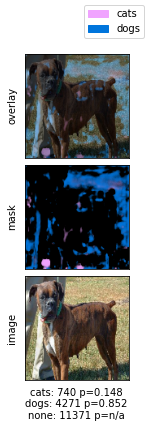

(3, 1)


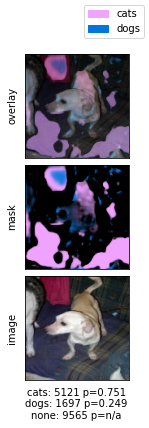

(3, 1)


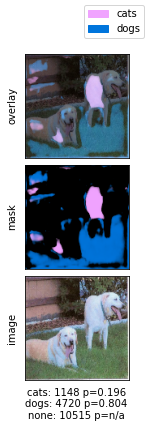

(3, 1)


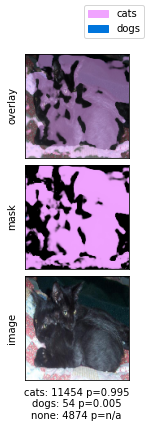

(3, 1)


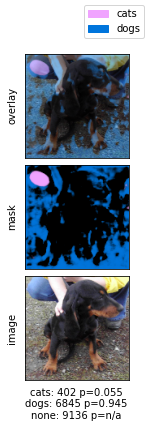

(3, 1)


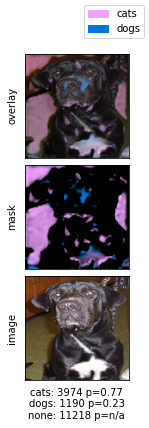

(3, 1)


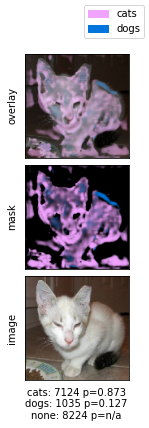

(3, 1)


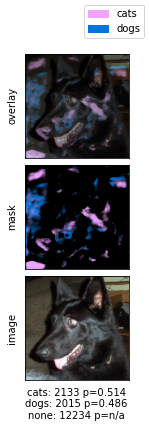

(3, 1)


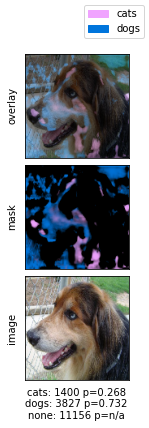

(3, 1)


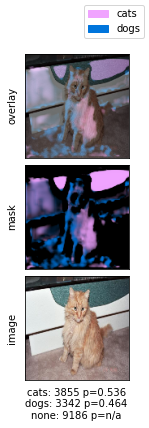

(3, 1)


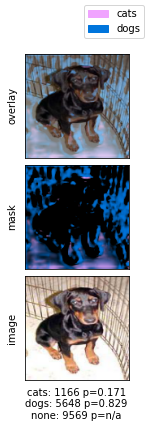

(3, 1)


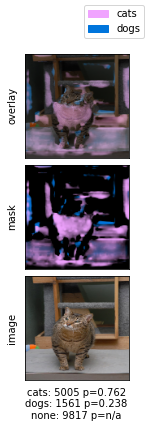

(3, 1)


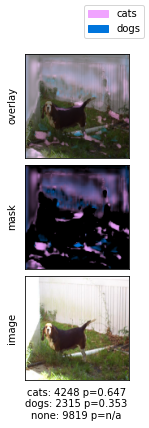

(3, 1)


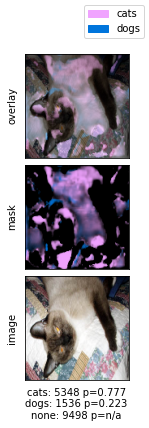

(3, 1)


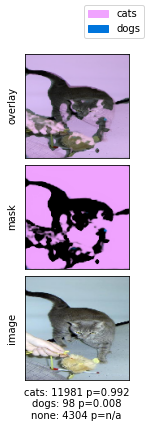

(3, 1)


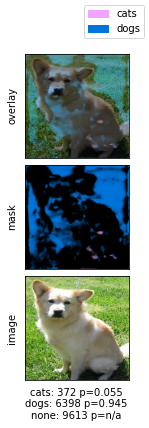

In [2]:
from supervised.models.cnn import *
from supervised.evaluations.image_classification import show_mask

from supervised.util import load_most_recent_results

result_path = '../random/'

results = load_most_recent_results(result_path, 1)[0]

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data
keras_model = model_data.get_model()
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['train']
test_dset = test_dset.batch(results.config.dataset_params['batch'])

for x, y in iter(test_dset):
    print(x.shape, y.shape)
    break

show_mask(test_dset, 16, model_data, class_names=class_names)